In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

#Set the style options
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')

In [2]:
#import the file
df_cars = pd.read_csv('data/city_30.csv', index_col = 0, header = 0)

#Drop picture for the sake of file size
df_cars = df_cars.drop('main_picture_url', axis = 1)
df_cars = df_cars.drop('description', axis = 1)

In [3]:
df_cars.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 63 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     302590 non-null  object 
 1   back_legroom             286707 non-null  object 
 2   bed                      2317 non-null    object 
 3   bed_height               37879 non-null   object 
 4   bed_length               37879 non-null   object 
 5   body_type                301216 non-null  object 
 6   cabin                    5555 non-null    object 
 7   city_fuel_economy        255261 non-null  float64
 8   combine_fuel_economy     0 non-null       float64
 9   daysonmarket             302590 non-null  int64  
 10  dealer_zip               302590 non-null  int64  
 11  engine_cylinders         292100 non-null  object 
 12  engine_displacement      285071 non-null  float64
 13  engine_type              292100 non-null  object 
 14  

## After importing and viewing the file, we begin to explore the data. take note of Dtypes, non-null counts, and try to figure out what features are worth keeping or getting rid of.

In [4]:
df_cars['fleet'].describe()

# describe fleet, note null values

count     163086
unique         2
top        False
freq      120034
Name: fleet, dtype: object

In [5]:
df_cars.head()

# view head

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
273335,Denver,NaN,NaN,NaN,NaN,Pickup Truck,NaN,NaN,NaN,66,80231,V8,NaN,V8,Grey,False,False,False,NaN,NaN,NaN,Gasoline,False,NaN,NaN,NaN,Black,False,NaN,NaN,False,NaN,39.6802,NaN,2020-07-08,GRAY,275999568,-104.9030,['Steel Wheels'],Toyota,NaN,194490.0,Tundra,3.0,NaN,13900.0,False,766,4.571429,435171.0,King Auto,False,NaN,A,6-Speed Automatic Overdrive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
20660,Houston,34.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,12.0,NaN,117,77074,V8,5700.0,V8,Nebula Gray Pearl,NaN,NaN,True,Lexus,42.9 in,24.6 gal,Gasoline,NaN,75.2 in,16.0,383.0,None,NaN,NaN,NaN,True,NaN,29.6673,200 in,2020-05-17,GRAY,272176442,-95.5518,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lexus,8 seats,98.0,LX,NaN,"383 hp @ 5,600 RPM",98390.0,NaN,0,4.035088,239576.0,Sterling McCall Lexus,NaN,"403 lb-ft @ 3,600 RPM",A,Automatic,t91117,570 3-Row 4WD,NaN,AWD,All-Wheel Drive,112.2 in,78 in,2020
129041,Las Vegas,37.9 in,NaN,NaN,NaN,Sedan,NaN,23.0,NaN,66,89146,I4,2000.0,I4,Wave Metallic,NaN,NaN,True,Cadillac,42.4 in,17.4 gal,Gasoline,NaN,57.2 in,32.0,237.0,Jet Black with Jet Black Accents,NaN,NaN,NaN,True,NaN,36.1443,193.8 in,2020-07-07,UNKNOWN,275926401,-115.2100,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Cadillac,5 seats,14.0,CT5,NaN,"335 hp @ 5,600 RPM",43960.0,NaN,0,4.387097,50957.0,Cadillac of Las Vegas,NaN,"405 lb-ft @ 2,400 RPM",A,Automatic,t86856,Premium Luxury Sedan RWD,NaN,RWD,Rear-Wheel Drive,116 in,80.3 in,2020
246910,Cincinnati,38.5 in,NaN,NaN,NaN,SUV / Crossover,NaN,17.0,NaN,73,45255,V6,3500.0,V6,Gray,False,False,True,Subaru,41.4 in,21 gal,Gasoline,False,72.7 in,24.0,250.0,Brown (Beige),False,NaN,NaN,False,NaN,39.0729,191.4 in,2020-06-30,GRAY,275327492,-84.3332,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Honda,8 seats,196315.0,Pilot,1.0,"250 hp @ 5,700 RPM",7695.0,False,109,4.552632,283867.0,Beechmont Subaru,False,"253 lb-ft @ 4,800 RPM",A,5-Speed Automatic,t46998,EX 4WD,NaN,4WD,Four-Wheel Drive,109.2 in,78.5 in,2013
266975,Tucson,36.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,20.0,NaN,35,85712,I4,2400.0,I4,Silver Topaz Metallic,True,False,False,NaN,40.7 in,19 gal,Gasoline,False,67 in,28.0,180.0,Black,True,NaN,NaN,False,NaN,32.2365,180.1 in,2020-08-07,SILVER,278674980,-110.8630,"['Navigation System', 'Alloy Wheels', 'Bluetoo...",Chevrolet,5 seats,91212.0,Captiva Sport,4.0,"180 hp @ 6,700 RPM",9479.0,False,675,4.000000,312337.0,Chapman Used Cars on Speedway,False,"172 lb-ft @ 4,900 RPM",A,6-Speed Automatic,t49723,2LS,NaN,FWD,Front-Wheel Drive,106.6 in,72.8 in,2013


In [6]:
df_cars['transmission'].value_counts()

# value counts for transmission

A              241622
CVT             46534
M                5638
Dual Clutch      1211
Name: transmission, dtype: int64

In [7]:
df_cars['frame_damaged'].value_counts()

# value counts for frame damaged

False    160865
True       2221
Name: frame_damaged, dtype: int64

In [8]:
df_copy = df_cars

# make a copy

In [9]:
df_cars = df_cars.drop(['vehicle_damage_category', 'combine_fuel_economy', 'is_certified'], axis = 1)

#drop the columns with no values

In [10]:
df_cars.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  302590 non-null  object 
 1   back_legroom          286707 non-null  object 
 2   bed                   2317 non-null    object 
 3   bed_height            37879 non-null   object 
 4   bed_length            37879 non-null   object 
 5   body_type             301216 non-null  object 
 6   cabin                 5555 non-null    object 
 7   city_fuel_economy     255261 non-null  float64
 8   daysonmarket          302590 non-null  int64  
 9   dealer_zip            302590 non-null  int64  
 10  engine_cylinders      292100 non-null  object 
 11  engine_displacement   285071 non-null  float64
 12  engine_type           292100 non-null  object 
 13  exterior_color        302583 non-null  object 
 14  fleet                 163086 non-null  object 
 

In [11]:
def new_car(c):
    if c['is_new']:
        return 1
    else:
        return 0
    
df_cars['new'] = df_cars.apply(new_car,axis = 1)

# engineer features and create new

In [12]:
df_cars['new'].describe()

# describe new

count    302590.000000
mean          0.473819
std           0.499315
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: new, dtype: float64

In [13]:
df_cars.head()

# view head

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new
273335,Denver,NaN,NaN,NaN,NaN,Pickup Truck,NaN,NaN,66,80231,V8,NaN,V8,Grey,False,False,False,NaN,NaN,NaN,Gasoline,False,NaN,NaN,NaN,Black,False,NaN,False,NaN,39.6802,NaN,2020-07-08,GRAY,275999568,-104.9030,['Steel Wheels'],Toyota,NaN,194490.0,Tundra,3.0,NaN,13900.0,False,766,4.571429,435171.0,King Auto,False,NaN,A,6-Speed Automatic Overdrive,NaN,NaN,NaN,NaN,NaN,NaN,2008,0
20660,Houston,34.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,12.0,117,77074,V8,5700.0,V8,Nebula Gray Pearl,NaN,NaN,True,Lexus,42.9 in,24.6 gal,Gasoline,NaN,75.2 in,16.0,383.0,None,NaN,NaN,True,NaN,29.6673,200 in,2020-05-17,GRAY,272176442,-95.5518,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lexus,8 seats,98.0,LX,NaN,"383 hp @ 5,600 RPM",98390.0,NaN,0,4.035088,239576.0,Sterling McCall Lexus,NaN,"403 lb-ft @ 3,600 RPM",A,Automatic,t91117,570 3-Row 4WD,AWD,All-Wheel Drive,112.2 in,78 in,2020,1
129041,Las Vegas,37.9 in,NaN,NaN,NaN,Sedan,NaN,23.0,66,89146,I4,2000.0,I4,Wave Metallic,NaN,NaN,True,Cadillac,42.4 in,17.4 gal,Gasoline,NaN,57.2 in,32.0,237.0,Jet Black with Jet Black Accents,NaN,NaN,True,NaN,36.1443,193.8 in,2020-07-07,UNKNOWN,275926401,-115.2100,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Cadillac,5 seats,14.0,CT5,NaN,"335 hp @ 5,600 RPM",43960.0,NaN,0,4.387097,50957.0,Cadillac of Las Vegas,NaN,"405 lb-ft @ 2,400 RPM",A,Automatic,t86856,Premium Luxury Sedan RWD,RWD,Rear-Wheel Drive,116 in,80.3 in,2020,1
246910,Cincinnati,38.5 in,NaN,NaN,NaN,SUV / Crossover,NaN,17.0,73,45255,V6,3500.0,V6,Gray,False,False,True,Subaru,41.4 in,21 gal,Gasoline,False,72.7 in,24.0,250.0,Brown (Beige),False,NaN,False,NaN,39.0729,191.4 in,2020-06-30,GRAY,275327492,-84.3332,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Honda,8 seats,196315.0,Pilot,1.0,"250 hp @ 5,700 RPM",7695.0,False,109,4.552632,283867.0,Beechmont Subaru,False,"253 lb-ft @ 4,800 RPM",A,5-Speed Automatic,t46998,EX 4WD,4WD,Four-Wheel Drive,109.2 in,78.5 in,2013,0
266975,Tucson,36.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,20.0,35,85712,I4,2400.0,I4,Silver Topaz Metallic,True,False,False,NaN,40.7 in,19 gal,Gasoline,False,67 in,28.0,180.0,Black,True,NaN,False,NaN,32.2365,180.1 in,2020-08-07,SILVER,278674980,-110.8630,"['Navigation System', 'Alloy Wheels', 'Bluetoo...",Chevrolet,5 seats,91212.0,Captiva Sport,4.0,"180 hp @ 6,700 RPM",9479.0,False,675,4.000000,312337.0,Chapman Used Cars on Speedway,False,"172 lb-ft @ 4,900 RPM",A,6-Speed Automatic,t49723,2LS,FWD,Front-Wheel Drive,106.6 in,72.8 in,2013,0


In [14]:
df_cars['is_cpo'].value_counts()

# value counts for certified pre owned

True    15781
Name: is_cpo, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

# import library

In [16]:
df_cars['is_cpo'] = lc.fit_transform(df_cars['is_cpo'])
df_cars['is_cpo'].value_counts()

# encode values for is_cpo

1    286809
0     15781
Name: is_cpo, dtype: int64

In [17]:
df_cars.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 61 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  302590 non-null  object 
 1   back_legroom          286707 non-null  object 
 2   bed                   2317 non-null    object 
 3   bed_height            37879 non-null   object 
 4   bed_length            37879 non-null   object 
 5   body_type             301216 non-null  object 
 6   cabin                 5555 non-null    object 
 7   city_fuel_economy     255261 non-null  float64
 8   daysonmarket          302590 non-null  int64  
 9   dealer_zip            302590 non-null  int64  
 10  engine_cylinders      292100 non-null  object 
 11  engine_displacement   285071 non-null  float64
 12  engine_type           292100 non-null  object 
 13  exterior_color        302583 non-null  object 
 14  fleet                 163086 non-null  object 
 

In [18]:
df_cars['dealer_zip'].value_counts()

# value counts for dealer_zip

77477    5552
33619    4178
77034    3932
77074    3907
77090    3651
85260    3547
43228    3329
77065    3202
95136    3171
78238    3078
33612    3001
85705    2998
78233    2988
85014    2987
45249    2923
46240    2797
32225    2652
85023    2614
78745    2595
89104    2485
77079    2429
79925    2402
89146    2375
27616    2207
32244    2200
85711    2174
28273    2146
87110    2138
78216    2044
37115    2040
85251    2016
76017    1904
78230    1866
28227    1846
33614    1809
89149    1792
32808    1790
46227    1746
33169    1736
77094    1725
32256    1668
29210    1659
75209    1594
45251    1578
40299    1551
33157    1526
73114    1524
53713    1500
46219    1479
45246    1474
78224    1468
65203    1468
95129    1467
32837    1459
29203    1455
77037    1448
43235    1414
32210    1380
78757    1330
78249    1324
43229    1316
75228    1308
73139    1285
79936    1273
77024    1261
65807    1254
60636    1246
87114    1238
40222    1212
78759    1208
32807    1206
89117 

In [19]:
df_cars['city'].value_counts()

# value_counts for city

Houston          32723
San Antonio      18657
Columbus         13717
Miami            13653
Jacksonville     12653
Las Vegas        12206
Tampa            11431
Phoenix          11111
Dallas           11032
Orlando          10819
Austin           10653
Columbia          9568
Indianapolis      9223
Cincinnati        9181
Charlotte         8379
Tucson            8211
Denver            8046
Springfield       7988
Oklahoma City     7898
Louisville        7284
El Paso           7244
Raleigh           7160
Madison           7031
Richmond          6944
Albuquerque       6874
San Jose          6726
Stafford          6666
Chicago           6625
Scottsdale        6487
Arlington         6400
Name: city, dtype: int64

In [20]:
df_reg = pd.DataFrame()

# beginning the dataframe for the regression model. We will add to the dataframe as we go.

In [21]:
df_reg['year'] = df_cars['year']

# add year to regression model dataframe

In [22]:
df_reg.info()

#view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   year    302590 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [23]:
df_reg['is_new'] = df_cars['new']

# add is_new to regression dataframe

In [24]:
df_reg['is_cpo'] = df_cars['is_cpo']

# add is_cpo to new dataframe

In [25]:
df_reg.info()

# view new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   year    302590 non-null  int64
 1   is_new  302590 non-null  int64
 2   is_cpo  302590 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 8.1 MB


In [26]:
df_cars['city_fuel_economy'].value_counts()

# value_counts for city_fuel_economy

19.0     21102
22.0     18321
20.0     17947
18.0     17527
17.0     17027
21.0     15824
26.0     15714
16.0     14267
27.0     13765
15.0     13461
25.0     12857
28.0     12149
23.0     11655
24.0     10090
30.0      9635
29.0      7680
14.0      5223
31.0      4253
13.0      2812
32.0      1937
43.0      1434
33.0      1417
12.0      1381
51.0       835
53.0       636
44.0       582
40.0       565
35.0       508
55.0       468
48.0       464
41.0       463
36.0       463
127.0      442
54.0       399
11.0       308
42.0       160
34.0       110
114.0       91
68.0        86
10.0        79
126.0       72
37.0        71
80.0        65
124.0       63
123.0       63
49.0        63
57.0        57
74.0        52
46.0        47
58.0        47
38.0        46
39.0        37
120.0       36
121.0       34
45.0        26
52.0        26
9.0         24
67.0        22
76.0        20
88.0        18
102.0       17
47.0        16
125.0       16
91.0        15
64.0        15
101.0       14
63.0      

In [27]:
df_cars['city_fuel_economy'].describe()

# describe city_fuel_economy

count    255261.000000
mean         22.892972
std           8.888540
min           8.000000
25%          18.000000
50%          22.000000
75%          26.000000
max         127.000000
Name: city_fuel_economy, dtype: float64

In [28]:
df_cars['city_fuel_economy'].isna()

# search for missing values for city_fuel_economy

273335     True
20660     False
129041    False
246910    False
266975    False
          ...  
124319    False
214843    False
324878    False
291789    False
52208     False
Name: city_fuel_economy, Length: 302590, dtype: bool

In [29]:
df_cars[df_cars['city_fuel_economy'].isna()].sample(20)

# view sample of na for city_fuel_economy

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new
399427,Arlington,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,12,76011,I4,NaN,I4,Daytona Gray Pearl Effect,False,False,True,Toyota,NaN,NaN,Gasoline,False,NaN,NaN,NaN,Black,False,1,False,NaN,32.7603,NaN,2020-08-30,GRAY,280827900,-97.0864,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Audi,NaN,28864.0,Q3,1.0,NaN,25795.0,False,139,4.738095,386133.0,Family Toyota of Arlington,False,NaN,A,6-Speed Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2018,0
250257,Charlotte,NaN,NaN,NaN,NaN,Pickup Truck,NaN,NaN,1,28212,NaN,NaN,NaN,Silver Ice Metallic,NaN,NaN,True,Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dark Ash seats with Jet Black interior accents,NaN,1,True,NaN,35.1903,NaN,2020-09-09,SILVER,281576300,-80.7606,"['Bluetooth', 'Backup Camera']",Chevrolet,NaN,0.0,Silverado 1500,NaN,NaN,58637.0,NaN,0,4.386364,199435.0,Rick Hendrick City Chevrolet,NaN,NaN,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2020,1
121255,Jacksonville,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,8,32244,NaN,NaN,NaN,Black Sapphire Metallic,NaN,NaN,True,BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black SensaTec,NaN,1,True,NaN,30.2240,NaN,2020-09-02,BLACK,281090983,-81.7376,"['Sunroof/Moonroof', 'Navigation System', 'All...",BMW,NaN,5.0,X3,NaN,NaN,50620.0,NaN,0,5.000000,60471.0,Tom Bush BMW Orange Park,NaN,NaN,A,8-Speed Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2021,1
120349,Jacksonville,36 in,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,89,32256,NaN,1300.0,NaN,Satin Steel Metallic,NaN,NaN,True,Buick,40.9 in,13.2 gal,NaN,NaN,64.1 in,NaN,150.0,Gray (Ebony with Ebony interior accents),NaN,1,True,NaN,30.1576,171.4 in,2020-06-13,UNKNOWN,274024489,-81.5303,"['Navigation System', 'Adaptive Cruise Control...",Buick,5 seats,464.0,Encore GX,NaN,"150 hp @ 5,600 RPM",25944.0,NaN,0,4.481481,48064.0,Nimnicht Buick GMC,NaN,"174 lb-ft @ 1,500 RPM",CVT,Continuously Variable Transmission,t88215,Select FWD,FWD,Front-Wheel Drive,102.2 in,71.4 in,2020,1
144026,Tampa,33.4 in,NaN,NaN,NaN,Hatchback,NaN,NaN,6,33612,I4 Hybrid,1800.0,I4 Hybrid,Red,NaN,NaN,True,Toyota,42.3 in,11.3 gal,Hybrid,NaN,57.9 in,NaN,121.0,Blk,NaN,1,True,NaN,28.0692,180 in,2020-09-04,RED,281242126,-82.4481,NaN,Toyota,5 seats,NaN,Prius,NaN,NaN,30749.0,NaN,0,4.200000,54233.0,Toyota of Tampa Bay,NaN,NaN,CVT,Continuously Variable Transmission,t94207,2020 Edition FWD,FWD,Front-Wheel Drive,106.3 in,69.3 in,2021,1
394405,Scottsdale,40.2 in,NaN,--,98.3 in,Pickup Truck,NaN,NaN,28,85251,I6 Diesel,6700.0,I6 Diesel,Bright White,NaN,NaN,True,RAM,40.9 in,32 gal,Diesel,NaN,79.3 in,NaN,370.0,Diesel Gray/Black,NaN,1,True,NaN,33.4922,260.8 in,2020-08-14,WHITE,279244186,-111.8910,['Dual Rear Wheels'],RAM,6 seats,NaN,3500,NaN,"370 hp @ 2,800 RPM",55680.0,NaN,0,4.352941,278729.0,Chapman Dodge Chrysler Jeep Ram,NaN,"850 lb-ft @ 1,700 RPM",A,6-Speed Automatic,t84702,Tradesman Crew Cab LB DRW 4WD,4WD,Four-Wheel Drive,169 in,96.5 in,2019,1
28196,Houston,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,NaN,185,77034,I4,NaN,I4,Denim Blue,NaN,NaN,True,Volvo,NaN,NaN,Gasoline,NaN,NaN,NaN,NaN,Blue (Blond/Charcoal),NaN,1,True,NaN,29.6193,NaN,2020-03-10,BLUE,268217899,-95.2190,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Volvo,NaN,10.0,XC90,NaN,NaN,58845.0,NaN,0,4.307692,326328.0,Bayway Volvo Cars,NaN,NaN,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2020,1
378718,Stafford,NaN,Long,NaN,NaN,Pickup Truck,NaN,NaN,62,22554,NaN,6600.0,NaN,Green,False,False,False,Na

In [30]:
df_cars['city_fuel_economy'] = df_cars['city_fuel_economy'].fillna(22)

# fill null values with median

In [31]:
df_cars['city_fuel_economy'].value_counts()

# value_counts for city_fuel_economy

22.0     65650
19.0     21102
20.0     17947
18.0     17527
17.0     17027
21.0     15824
26.0     15714
16.0     14267
27.0     13765
15.0     13461
25.0     12857
28.0     12149
23.0     11655
24.0     10090
30.0      9635
29.0      7680
14.0      5223
31.0      4253
13.0      2812
32.0      1937
43.0      1434
33.0      1417
12.0      1381
51.0       835
53.0       636
44.0       582
40.0       565
35.0       508
55.0       468
48.0       464
41.0       463
36.0       463
127.0      442
54.0       399
11.0       308
42.0       160
34.0       110
114.0       91
68.0        86
10.0        79
126.0       72
37.0        71
80.0        65
124.0       63
123.0       63
49.0        63
57.0        57
74.0        52
46.0        47
58.0        47
38.0        46
39.0        37
120.0       36
121.0       34
45.0        26
52.0        26
9.0         24
67.0        22
76.0        20
88.0        18
102.0       17
47.0        16
125.0       16
91.0        15
64.0        15
101.0       14
63.0      

In [32]:
df_reg['city_fuel_economy'] = df_cars['city_fuel_economy']

# add city_fuel_economy to regression dataframe

In [33]:
df_cars['highway_fuel_economy'].describe()

# describe highway fule economy

count    255261.000000
mean         29.801815
std           7.906289
min          11.000000
25%          25.000000
50%          29.000000
75%          34.000000
max         127.000000
Name: highway_fuel_economy, dtype: float64

In [34]:
df_cars['highway_fuel_economy'] = df_cars['highway_fuel_economy'].fillna(29)

# fill with median value from above

In [35]:
df_reg['highway_fuel_economy'] = df_cars['highway_fuel_economy']

# add highway_fuel_economy to new dataframe

In [36]:
df_cars.info()

# view info for cars

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 61 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  302590 non-null  object 
 1   back_legroom          286707 non-null  object 
 2   bed                   2317 non-null    object 
 3   bed_height            37879 non-null   object 
 4   bed_length            37879 non-null   object 
 5   body_type             301216 non-null  object 
 6   cabin                 5555 non-null    object 
 7   city_fuel_economy     302590 non-null  float64
 8   daysonmarket          302590 non-null  int64  
 9   dealer_zip            302590 non-null  int64  
 10  engine_cylinders      292100 non-null  object 
 11  engine_displacement   285071 non-null  float64
 12  engine_type           292100 non-null  object 
 13  exterior_color        302583 non-null  object 
 14  fleet                 163086 non-null  object 
 

In [37]:
def accident(c):
    if c['has_accidents']:
        return 1
    else:
        return 0
    
df_cars['accidents'] = df_cars.apply(accident,axis = 1)

# engineer features and create accidents

In [38]:
df_cars['accidents'].value_counts()

# view value_counts

1    166954
0    135636
Name: accidents, dtype: int64

In [39]:
df_reg['has_accident'] = df_cars['accidents']

# add accidents to regression dataframe

In [40]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  302590 non-null  int64  
 1   is_new                302590 non-null  int64  
 2   is_cpo                302590 non-null  int32  
 3   city_fuel_economy     302590 non-null  float64
 4   highway_fuel_economy  302590 non-null  float64
 5   has_accident          302590 non-null  int64  
dtypes: float64(2), int32(1), int64(3)
memory usage: 15.0 MB


In [41]:
df_cars['owner_count'].value_counts()

# view value_counts for number of owners

1.0     97481
2.0     35168
3.0     13826
4.0      5095
5.0      1865
6.0       722
7.0       306
8.0       144
9.0        60
10.0       21
11.0        7
12.0        5
13.0        1
Name: owner_count, dtype: int64

In [42]:
df_cars['owner_count'] = df_cars['owner_count'].fillna(0)

# fill missing values with 0 assuming that these cars are new

In [43]:
df_reg['owner_count'] = df_cars['owner_count']

# add owner_count to regression dataframe

In [44]:
df_reg.info()

# view info for regression model dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  302590 non-null  int64  
 1   is_new                302590 non-null  int64  
 2   is_cpo                302590 non-null  int32  
 3   city_fuel_economy     302590 non-null  float64
 4   highway_fuel_economy  302590 non-null  float64
 5   has_accident          302590 non-null  int64  
 6   owner_count           302590 non-null  float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 17.3 MB


In [45]:
df_cars['fuel_type'].value_counts()

# view value_counts for fuel type

Gasoline                  264402
Flex Fuel Vehicle          14372
Hybrid                      7332
Diesel                      4065
Biodiesel                   2016
Electric                    1812
Compressed Natural Gas        15
Name: fuel_type, dtype: int64

In [46]:
df_cars['fuel_type'] = df_cars['fuel_type'].fillna('Unknown')

# fill na with 'Unknown'

In [47]:
df_cars['fuel_type'].value_counts()

# view value_counts again

Gasoline                  264402
Flex Fuel Vehicle          14372
Unknown                     8576
Hybrid                      7332
Diesel                      4065
Biodiesel                   2016
Electric                    1812
Compressed Natural Gas        15
Name: fuel_type, dtype: int64

In [48]:
dummies_ft = pd.get_dummies(df_cars['fuel_type'], drop_first = False, prefix = 'ft', dtype = 'int')

# dummy variables for fuel type

In [49]:
dummies_ft.sample(15, random_state = 42)

# view sample of dummy variables 

,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Gasoline,ft_Hybrid,ft_Unknown
113683,0,0,0,0,0,1,0,0
351883,0,0,0,0,0,1,0,0
217310,0,0,0,0,0,1,0,0
154595,0,0,0,0,0,1,0,0
42851,0,0,0,0,0,1,0,0
248874,0,0,0,0,0,1,0,0
261632,0,0,0,0,0,1,0,0
96671,0,0,0,0,0,1,0,0
195454,0,0,0,0,0,1,0,0
127273,0,0,0,0,0,1,0,0


In [50]:
dummies_ft = dummies_ft.drop('ft_Gasoline', axis = 1)

# drop gasoline

In [1]:
df_reg = pd.concat([df_reg, dummies_ft], axis = 1)

# add dummy variables to regression dataframe

NameError: name 'pd' is not defined

In [52]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       302590 non-null  int64  
 1   is_new                     302590 non-null  int64  
 2   is_cpo                     302590 non-null  int32  
 3   city_fuel_economy          302590 non-null  float64
 4   highway_fuel_economy       302590 non-null  float64
 5   has_accident               302590 non-null  int64  
 6   owner_count                302590 non-null  float64
 7   ft_Biodiesel               302590 non-null  int32  
 8   ft_Compressed Natural Gas  302590 non-null  int32  
 9   ft_Diesel                  302590 non-null  int32  
 10  ft_Electric                302590 non-null  int32  
 11  ft_Flex Fuel Vehicle       302590 non-null  int32  
 12  ft_Hybrid                  302590 non-null  int32  
 13  ft_Unknown               

In [53]:
df_cars['wheel_system'].value_counts()

# value_counts for wheel system

FWD    149449
AWD     52667
4WD     42579
RWD     26334
4X2     16917
Name: wheel_system, dtype: int64

In [54]:
df_cars['wheel_system'] = df_cars['wheel_system'].fillna('Unknown')

# fill na with unknown

In [55]:
dummies_ws = pd.get_dummies(df_cars['wheel_system'], drop_first = False, prefix = 'ws', dtype = 'int')

#dummy variables for wheel_system

In [56]:
dummies_ws.sample(15, random_state = 42)

# view sample of dummy variables 

,ws_4WD,ws_4X2,ws_AWD,ws_FWD,ws_RWD,ws_Unknown
113683,0,0,0,1,0,0
351883,1,0,0,0,0,0
217310,0,0,0,1,0,0
154595,0,0,1,0,0,0
42851,0,0,0,1,0,0
248874,0,0,1,0,0,0
261632,0,0,1,0,0,0
96671,0,0,0,1,0,0
195454,0,1,0,0,0,0
127273,1,0,0,0,0,0


In [57]:
df_reg = pd.concat([df_reg, dummies_ws], axis = 1)

# add dummy variables to df_reg

In [58]:
df_reg = df_reg.drop('ws_FWD', axis = 1)

# drop ws_FWD

In [59]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       302590 non-null  int64  
 1   is_new                     302590 non-null  int64  
 2   is_cpo                     302590 non-null  int32  
 3   city_fuel_economy          302590 non-null  float64
 4   highway_fuel_economy       302590 non-null  float64
 5   has_accident               302590 non-null  int64  
 6   owner_count                302590 non-null  float64
 7   ft_Biodiesel               302590 non-null  int32  
 8   ft_Compressed Natural Gas  302590 non-null  int32  
 9   ft_Diesel                  302590 non-null  int32  
 10  ft_Electric                302590 non-null  int32  
 11  ft_Flex Fuel Vehicle       302590 non-null  int32  
 12  ft_Hybrid                  302590 non-null  int32  
 13  ft_Unknown               

In [60]:
df_cars[df_cars['mileage'] == 0]

# set mileage to 0

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new,accidents
21753,Houston,35.1 in,NaN,NaN,NaN,Sedan,NaN,17.0,250,77024,V6,2900.0,V6,Vulcano Black Metallic,NaN,NaN,True,Alfa Romeo,42.4 in,15.3 gal,Gasoline,NaN,56.1 in,25.0,505.0,Black,NaN,1,True,NaN,29.7839,182.6 in,2020-01-05,BLACK,262440429,-95.4692,"['Navigation System', 'Alloy Wheels', 'Bluetoo...",Alfa Romeo,5 seats,0.0,Giulia,0.0,"505 hp @ 6,500 RPM",73440.0,NaN,0,5.000000,302136.0,Helfman Fiat Alfa Romeo Maserati,NaN,"443 lb-ft @ 2,500 RPM",A,8-Speed Automatic,t88983,Quadrifoglio RWD,RWD,Rear-Wheel Drive,111 in,79.7 in,2020,1,1
249739,Charlotte,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,28,28212,I4,1500.0,I4,Mosaic Black Metallic,NaN,NaN,True,Chevrolet,40.9 in,15.6 gal,Gasoline,NaN,65.4 in,29.0,170.0,Medium Ash Gray,NaN,1,True,NaN,35.1903,183.1 in,2020-08-13,BLACK,279215010,-80.7606,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Chevrolet,5 seats,0.0,Equinox,0.0,"170 hp @ 5,600 RPM",24563.0,NaN,0,4.386364,199435.0,Rick Hendrick City Chevrolet,NaN,"203 lb-ft @ 2,000 RPM",A,Automatic,t85742,1.5T LS AWD,4WD,Four-Wheel Drive,107.3 in,72.6 in,2020,1,1
137952,Las Vegas,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,20.0,29,89130,V6,3500.0,V6,Iconic Silver Metallic,False,False,True,Ford,43.9 in,26 gal,Gasoline,False,75.6 in,26.0,375.0,Silver (Blk Unique Spt Clth),False,1,True,NaN,36.2623,231.9 in,2020-08-13,SILVER,279229766,-115.2500,"['101A Mid Equipment Group', 'Appearance Packa...",Ford,6 seats,0.0,F-150,0.0,"395 hp @ 5,750 RPM",42285.0,False,0,4.555556,56827.0,Team Ford Lincoln,False,"400 lb-ft @ 4,500 RPM",A,Automatic,t87709,XL SuperCrew RWD,4X2,4X2,145 in,96.8 in,2020,1,0
120690,Jacksonville,35.2 in,NaN,--,79.4 in,Pickup Truck,NaN,15.0,13,32210,V8,5300.0,V8,Summit White,NaN,NaN,True,Chevrolet,44.5 in,24 gal,Gasoline,NaN,75.6 in,21.0,355.0,Jet Black,NaN,1,True,NaN,30.2905,231.7 in,2020-08-28,WHITE,280618977,-81.7309,"['Value Package', 'Alloy Wheels', 'Bluetooth',...",Chevrolet,6 seats,0.0,Silverado 1500,0.0,"355 hp @ 5,600 RPM",37245.0,NaN,0,3.803922,47964.0,Nimnicht Chevrolet,NaN,"383 lb-ft @ 4,100 RPM",A,Automatic,t86474,Custom Double Cab RWD,4X2,4X2,147.5 in,81.2 in,2020,1,1
342311,Albuquerque,35.7 in,NaN,NaN,NaN,Sedan,NaN,22.0,183,87114,I4,2000.0,I4,Deep Sea Blue,NaN,NaN,True,Kia,42.2 in,14 gal,Gasoline,NaN,56.5 in,29.0,147.0,Black w/Woven Cloth Seat Trim,NaN,1,True,NaN,35.1905,182.7 in,2020-03-12,BLUE,268395331,-106.6640,['Bluetooth'],Kia,5 seats,0.0,Forte,0.0,"147 hp @ 6,200 RPM",19255.0,NaN,0,4.600000,67734.0,Pitre Kia,NaN,"132 lb-ft @ 4,500 RPM",CVT,Continuously Variable Transmission,t85069,LXS FWD,FWD,Front-Wheel Drive,106.3 in,70.9 in,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320966,El Paso,33.6 in,NaN,--,59.5 in,Pickup Truck,NaN,22.0,0,79932,V6,3800.0,V6,Brilliant Silver Metallic,NaN,NaN,True,Nissan,42.4 in,21.1 gal,Gasoline,NaN,70.1 in,29.0,310.0,Steel,NaN,1,True,NaN,31.8877,205.5 in,2020-09-12,SILVER,281902605,-106.5830,NaN,Nissan,5 seats,0.0,Frontier,0.0,"310 hp @ 6,400 RPM",30755.0,NaN,0,3.692308,400873.0,Charlie Clark Nissan El Paso,NaN,"281 lb-ft @ 4,400 RPM",A,Automatic,t94251,SV Crew Cab RWD,4X2,4X2,125.9 in,72.8 in,2

In [61]:
df_cars['mileage'] = df_cars['mileage'].fillna(0)

# assume that cars with na for mileage are new

In [62]:
df_cars.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  302590 non-null  object 
 1   back_legroom          286707 non-null  object 
 2   bed                   2317 non-null    object 
 3   bed_height            37879 non-null   object 
 4   bed_length            37879 non-null   object 
 5   body_type             301216 non-null  object 
 6   cabin                 5555 non-null    object 
 7   city_fuel_economy     302590 non-null  float64
 8   daysonmarket          302590 non-null  int64  
 9   dealer_zip            302590 non-null  int64  
 10  engine_cylinders      292100 non-null  object 
 11  engine_displacement   285071 non-null  float64
 12  engine_type           292100 non-null  object 
 13  exterior_color        302583 non-null  object 
 14  fleet                 163086 non-null  object 
 

In [63]:
df_reg['mileage'] = df_cars['mileage']

# add mileage to df_reg

In [64]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302590 entries, 273335 to 52208
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       302590 non-null  int64  
 1   is_new                     302590 non-null  int64  
 2   is_cpo                     302590 non-null  int32  
 3   city_fuel_economy          302590 non-null  float64
 4   highway_fuel_economy       302590 non-null  float64
 5   has_accident               302590 non-null  int64  
 6   owner_count                302590 non-null  float64
 7   ft_Biodiesel               302590 non-null  int32  
 8   ft_Compressed Natural Gas  302590 non-null  int32  
 9   ft_Diesel                  302590 non-null  int32  
 10  ft_Electric                302590 non-null  int32  
 11  ft_Flex Fuel Vehicle       302590 non-null  int32  
 12  ft_Hybrid                  302590 non-null  int32  
 13  ft_Unknown               

In [65]:
df_reg['days_on_market'] = df_cars['daysonmarket']

# add days_on_market to df_reg

In [66]:
df_reg['price'] = df_cars['price']

# add price to df_reg

## To this point we spent our time discussing which features would be important to include in our model. We finally reached a point where we felt we could make a decent model and have a model ready before our first return to the whole group. 

In [67]:
X = df_reg.drop('price', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# multiple regression 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     8535.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:42:41   Log-Likelihood:            -3.3626e+06
No. Observations:              302590   AIC:                         6.725e+06
Df Residuals:                  302568   BIC:                         6.725e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.219e+06   2.06e+04   -107.461      0.000   -2.26e+06   -2.18e+06
year                       1122.4235     10.231    109.711      0.000    1102.372    1142.475
is_new                     8539.9721    131.902     64.745      0.000    8281.448    8798.496
is_cpo                    -5323.0226    139.211    -38.237      0.000   -5595.873   -5050.173
city_fuel_economy            10.5790     14.291      0.740      0.459     -17.431      38.589
highway_fuel_economy       -669.8613     15.020    -44.598      0.000    -699.300    -640.422
has_accident              -2514.9430    101.966    -24.665      0.000   -2714.793   -2315.093
owner_count               -2186.3666     46.732    -46.786      0.000   -2277.959   -2094.774
ft_Biodiesel               1.969e+04    370.133     53.192      0.000     1.9e+04    2.04e+04
ft_Compressed Natural Gas -7189.0790   4187.571     -1.717      0.086   -1.54e+04    1018.442
ft_Diesel                  1.057e+04    262.524     40.277      0.000    1.01e+04    1.11e+04
ft_Electric                4.181e+04    506.458     82.557      0.000    4.08e+04    4.28e+04
ft_Flex Fuel Vehicle      -4505.0378    144.018    -31.281      0.000   -4787.309   -4222.766
ft_Hybrid                  6638.5200    241.638     27.473      0.000    6164.917    7112.123
ft_Unknown                 6787.8424    199.463     34.031      0.000    6396.900    7178.785
ws_4WD                      1.29e+04    107.611    119.862      0.000    1.27e+04    1.31e+04
ws_4X2                     8419.7858    142.812     58.957      0.000    8139.879    8699.693
ws_AWD                      1.06e+04     88.153    120.273      0.000    1.04e+04    1.08e+04
ws_RWD                     1.466e+04    112.560    130.232      0.000    1.44e+04    1.49e+04
ws_Unknown                 8549.4581    158.783     53.844      0.000    8238.247    8860.669
mileage                      -0.0026      0.000    -15.897      0.000      -0.003      -0.002
days_on_market                7.1387      0.286     24.934      0.000       6.578       7.700
==============================================================================
Omnibus:                   638019.722   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13734575396.084
Skew:                          17.682   Prob(JB):                         0.00
Kurtosis:                    1046.125   Cond. No.                     1.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Clearly this is not a good model, but we wanted to run one before the noon full group. the R^2 is not good and there are non significant P values.

In [68]:
#Import the library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create the VIF for the features dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

#Add a column for labels
vif['Features'] = X.columns[1:]

round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,Features
3,15.7,city_fuel_economy
4,13.7,highway_fuel_economy
1,5.0,is_new
5,3.0,has_accident
6,2.9,owner_count
0,2.1,year
10,1.8,ft_Electric
12,1.6,ft_Hybrid
14,1.6,ws_4WD
13,1.3,ft_Unknown


In [69]:
df_cars.sort_values('make_name')

# sort by make_name

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new,accidents
320315,El Paso,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,502,79936,NaN,NaN,NaN,Red,False,False,False,NaN,NaN,NaN,Unknown,True,NaN,29.0,NaN,Brown (Beige),False,1,False,NaN,31.7469,NaN,2019-04-29,RED,239237770,-106.2840,NaN,AM General,NaN,58025.0,Hummer,7.0,NaN,49995.0,False,0,4.714286,385358.0,U.S. CAR SALES,False,NaN,A,3-Speed Automatic,t76884,H1,Unknown,NaN,NaN,NaN,1993,0,1
130483,Las Vegas,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,84,89139,NaN,NaN,NaN,Tan,False,False,False,NaN,NaN,NaN,Unknown,False,NaN,29.0,NaN,Brown (Tan),False,1,False,NaN,36.0480,NaN,2020-06-19,BROWN,274505390,-115.1840,NaN,AM General,NaN,52512.0,Hummer,3.0,NaN,59500.0,False,0,4.857143,291810.0,Celebrity Cars Las Vegas,False,NaN,A,4-Speed Automatic,t68030,H1,Unknown,NaN,NaN,NaN,1995,0,0
153445,Tampa,NaN,NaN,NaN,NaN,Sedan,NaN,22.0,97,33612,NaN,NaN,NaN,Off White,False,False,False,NaN,NaN,NaN,Unknown,False,NaN,29.0,NaN,Blue,False,1,False,NaN,28.0625,NaN,2020-06-05,WHITE,273407799,-82.4506,NaN,AMC,NaN,84000.0,Rambler American,0.0,NaN,9999.0,False,0,4.500000,362314.0,OVE Car Trader Corp,False,NaN,A,Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,1965,0,0
377175,Chicago,34 in,NaN,NaN,NaN,Sedan,NaN,22.0,23,60642,I4,2400.0,I4,Majestic Black Pearl,NaN,NaN,True,Acura,42.3 in,13.2 gal,Gasoline,NaN,55.6 in,29.0,201.0,Black (Espresso),NaN,1,True,NaN,41.9054,182.2 in,2020-08-18,BLACK,279582451,-87.6596,"['Leather Seats', 'Sunroof/Moonroof', 'Adaptiv...",Acura,5 seats,0.0,ILX,0.0,"201 hp @ 6,800 RPM",29305.0,NaN,0,4.500000,311039.0,McGrath Acura of Downtown Chicago,NaN,"180 lb-ft @ 3,600 RPM",A,8-Speed Automatic,t89342,FWD with Premium Package,FWD,Front-Wheel Drive,105.1 in,70.6 in,2020,1,1
318686,El Paso,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,550,79935,V6,NaN,V6,Modern Steel Metallic,False,False,True,Scion,NaN,NaN,Gasoline,False,NaN,29.0,NaN,Ebony Leatherette,False,1,False,NaN,31.7422,NaN,2019-03-12,UNKNOWN,234509194,-106.3280,"['Sunroof/Moonroof', 'Bluetooth', 'Backup Came...",Acura,NaN,0.0,RDX,1.0,NaN,36510.0,False,0,5.000000,302650.0,FOX Toyota of El Paso,False,NaN,A,6-Speed Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340477,Madison,--,NaN,NaN,NaN,Convertible,NaN,22.0,12,53718,I3,900.0,I3,Red,False,False,True,Mazda,41.2 in,9.2 gal,Gasoline,False,61.1 in,29.0,89.0,Black,False,1,False,NaN,43.1382,106.1 in,2020-08-29,RED,280798509,-89.2909,"['Leather Seats', 'Heated Seats']",smart,2 seats,37915.0,fortwo,2.0,NaN,12494.0,False,3790,4.545455,336021.0,Russ Darrow Mazda of Madison,False,NaN,A,5-Speed Automatic,t68864,prime cabrio,RWD,Rear-Wheel Drive,73.7 in,74.5 in,2017,0,0
354252,Richmond,--,NaN,NaN,NaN,Convertible,NaN,22.0,7,23235,I3,1000.0,I3,Blue Metallic,False,False,True,Ford,41.2 in,8.7 gal,Gasoline,False,60.7 in,29.0,70.0,Brown (Design Beige),False,0,False,NaN,37.5068,106.1 in,2020-09-03,BLUE,281178380,-77.5936,['Alloy Wheels'],smart,2 seats,94550.0,fortwo,1.0,"70 hp @ 5,800 RPM",5000.0,False,176,4.342857,58243.0,Sheehy Ford Lincoln of Richmond,False,"68 lb-ft @ 4,500 RPM",A,5-Speed Automatic,t31716,passion cabrio,RWD,Rear-Wheel Drive,73.5 in,61.

In [70]:
df_cars['make_name'].value_counts()

# value counts for make_name

Ford                       41161
Chevrolet                  34277
Toyota                     25142
Nissan                     24175
Honda                      21536
Jeep                       15185
Hyundai                    14394
Kia                        12162
Volkswagen                 10118
Dodge                       9546
GMC                         9090
RAM                         8686
BMW                         7786
Mazda                       7147
Mercedes-Benz               6948
Buick                       5464
Subaru                      5376
Lexus                       4776
Cadillac                    4678
INFINITI                    4488
Audi                        3989
Acura                       3818
Chrysler                    3670
Lincoln                     3391
Volvo                       2719
Mitsubishi                  2558
Porsche                     1949
Land Rover                  1894
MINI                        1317
Jaguar                      1163
Alfa Romeo

In [71]:
pd.set_option('display.max_rows', 100)

# setting pandas to view more rows

In [72]:
df_cars['make_name'].value_counts()

# value counts for make_name

Ford                       41161
Chevrolet                  34277
Toyota                     25142
Nissan                     24175
Honda                      21536
Jeep                       15185
Hyundai                    14394
Kia                        12162
Volkswagen                 10118
Dodge                       9546
GMC                         9090
RAM                         8686
BMW                         7786
Mazda                       7147
Mercedes-Benz               6948
Buick                       5464
Subaru                      5376
Lexus                       4776
Cadillac                    4678
INFINITI                    4488
Audi                        3989
Acura                       3818
Chrysler                    3670
Lincoln                     3391
Volvo                       2719
Mitsubishi                  2558
Porsche                     1949
Land Rover                  1894
MINI                        1317
Jaguar                      1163
Alfa Romeo

In [73]:
df_lowsales = pd.DataFrame()

#Dataframe to hold low sales - dropping makes with counts < 1000 due to wide variety in prices and makes in small counts

In [ ]:
counts = df_cars['make_name'].value_counts()

df_lowsales = df_cars[~df_cars['make_name'].isin(counts[counts > 1000].index)]

#Creating a series of value counts
# Uses the counts series to determine if the make_name is a category with lower than 1000 values
#df_lowsales hold values less than 1000

In [75]:
df_lowsales.sample(75)

# view sample or low sales

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new,accidents
50233,San Antonio,40.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,17.0,2,78232,V6,3400.0,V6,Blue Streak Metallic,False,False,True,Buick,41.2 in,16 gal,Gasoline,True,69.3 in,22.0,185.0,Black (Ebony),False,1,False,NaN,29.6049,188.8 in,2020-09-09,BLUE,281604972,-98.4701,"['Alloy Wheels', 'Preferred Package']",Pontiac,5 seats,136865.0,Torrent,2.0,"185 hp @ 5,200 RPM",4400.0,False,196,4.207547,52907.0,Cavender Buick GMC North,False,"210 lb-ft @ 3,800 RPM",A,Automatic,t9398,FWD,FWD,Front-Wheel Drive,112.5 in,71.4 in,2006,0,1
375707,Chicago,35.1 in,NaN,NaN,NaN,Sedan,NaN,24.0,35,60603,I4,2000.0,I4,Blue,False,False,False,NaN,42.4 in,15.3 gal,Gasoline,False,56.5 in,33.0,280.0,Black,False,1,False,NaN,41.8794,182.6 in,2020-08-06,BLUE,278482578,-87.6331,"['Leather Seats', 'Alloy Wheels', 'Bluetooth',...",Alfa Romeo,5 seats,12882.0,Giulia,1.0,"280 hp @ 5,200 RPM",29990.0,False,1486,4.214286,405280.0,Carvana,False,"306 lb-ft @ 2,000 RPM",A,8-Speed Automatic,t75009,Ti Sport RWD,RWD,Rear-Wheel Drive,111 in,79.7 in,2018,0,0
325073,Raleigh,--,NaN,NaN,NaN,Convertible,NaN,13.0,44,27617,V8,4500.0,V8,Rosso Scuderia,False,False,True,Jeep,--,22.7 gal,Gasoline,False,47.8 in,17.0,562.0,Nero,False,1,False,NaN,35.9012,178.2 in,2020-07-28,UNKNOWN,277715335,-78.7622,"['Leather Seats', 'Alloy Wheels', 'Backup Came...",Ferrari,2 seats,16773.0,458 Italia,4.0,"562 hp @ 9,000 RPM",186900.0,False,9287,4.150685,197066.0,Westgate Chrysler Jeep Dodge Ram,False,"398 lb-ft @ 6,000 RPM",Dual Clutch,7-Speed Dual Clutch,t45088,Spider RWD,RWD,Rear-Wheel Drive,104.3 in,76.3 in,2013,0,0
118082,Jacksonville,40.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,43.0,148,32256,V6,3000.0,V6,Red,NaN,NaN,True,Bentley,41.7 in,16.5 gal,Gasoline,NaN,68 in,49.0,443.0,Red (Beluga Hide),NaN,1,True,NaN,30.2447,202.4 in,2020-04-15,RED,270520855,-81.5962,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Bentley,5 seats,16.0,Bentayga Hybrid,0.0,"443 hp @ 5,250 RPM",217290.0,NaN,0,NaN,440395.0,Bentley Jacksonville,NaN,"516 lb-ft @ 1,000 RPM",A,8-Speed Automatic,t88930,Hybrid AWD,AWD,All-Wheel Drive,117.9 in,87.6 in,2020,1,1
247491,Cincinnati,31.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,16,45246,I4,2000.0,I4,Alfa Rosso,NaN,NaN,True,Jeep,36.6 in,16.9 gal,Gasoline,NaN,66 in,28.0,280.0,Black,NaN,1,True,NaN,39.2878,184.6 in,2020-08-26,UNKNOWN,280322818,-84.4702,"['Leather Seats', 'Alloy Wheels', 'Bluetooth',...",Alfa Romeo,5 seats,10.0,Stelvio,0.0,"280 hp @ 5,200 RPM",42095.0,NaN,0,3.925926,62614.0,Jake Sweeney Chrysler Jeep Dodge,NaN,"306 lb-ft @ 2,000 RPM",A,Automatic,t88954,Ti AWD,AWD,All-Wheel Drive,111 in,74.9 in,2020,1,1
316893,El Paso,28.8 in,NaN,NaN,NaN,Coupe,NaN,15.0,16,79925,V8,5700.0,V8,TAN,False,False,False,NaN,43 in,16 gal,Gasoline,False,51.8 in,23.0,320.0,None,False,1,False,NaN,31.7936,193.7 in,2020-08-27,BROWN,280378070,-106.3610,['Alloy Wheels'],Pontiac,4 seats,104561.0,Firebird,1.0,"320 hp @ 5,200 RPM",17995.0,False,0,3.764706,284783.0,Southwest Auto Group of El Paso,False,"345 lb-ft @ 4,400 RPM",A,Automatic,t9497,Trans Am,RWD,Rear-Wheel Drive,101.1 in,74.4 in,2000,0,0
166845,Phoenix,--,NaN,NaN,NaN,Hatchback,NaN,33.0,52,85020,I3,1000.0,I3,White,False,False,False,NaN,41.2 in,8.7 gal,Gasoline,False,60.7 in,41.0,70.0,None,False,1,False,NaN,33.5694,106.1 in,2020-07-21,WHITE,277139775,-112.0650,"['Sunroof/Moonroof', 'Alloy

In [76]:
df_lowsales.shape

# view shape of low sales

(3987, 62)

In [77]:
df_lowsales['make_name'].value_counts()

# value counts of make_name

Alfa Romeo                 689
Genesis                    482
Maserati                   451
FIAT                       421
Scion                      298
Tesla                      277
Pontiac                    218
Bentley                    157
Mercury                    141
Ferrari                    141
Saturn                     117
Hummer                     115
McLaren                     71
Aston Martin                63
Lamborghini                 62
Rolls-Royce                 59
smart                       53
Suzuki                      39
Lotus                       24
Oldsmobile                  22
Saab                        20
Plymouth                    13
Karma                        7
Freightliner                 7
Isuzu                        7
Fisker                       7
SRT                          3
Datsun                       2
AM General                   2
MG                           2
Willys                       2
Shelby                       2
Sunbeam 

In [78]:
df_reg['make_name'] = df_cars['make_name']

# add make name to df_reg 

In [79]:
cond = df_cars['make_name'].isin(df_lowsales['make_name'])

# create a series of rows that are in both

df_cars.drop(df_cars[cond].index, inplace = True)
df_reg.drop(df_reg[cond].index, inplace = True)

# Drops anything from that series in df_cars and df_reg 

In [80]:
df_reg.info()

# view info 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [81]:
dummies_mn = pd.get_dummies(df_reg['make_name'], drop_first = False, prefix = 'mn', \
                            dtype = 'int')

# dummy variable make_name

In [82]:
df_reg = pd.concat([df_reg, dummies_mn], axis = 1)

# add dummy variables to regression dataframe

In [83]:
df_reg = df_reg.drop(['mn_Ford', 'make_name'], axis = 1)
df_reg.info()

# drop columns and view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [84]:
df_cars['model_name'].value_counts()

# value counts for model name

F-150              10990
Silverado 1500      6141
1500                5933
Corolla             4923
Rogue               4803
                   ...  
ECHO                   1
928                    1
C/K 1500 Series        1
GLI                    1
Apache                 1
Name: model_name, Length: 850, dtype: int64

In [85]:
df_c_pivot = df_cars.pivot_table(index='make_name', columns = 'model_name', values = 'price')

#Create a pivot table for 'Model Name' by 'Make Name'

df_c_pivot

#Display the pivot table

model_name,1 Series,1500,190-Class,2 Series,200,2002,210,240,2500,280,3 Series,3 Series Gran Turismo,300,300-Class,3000GT,300M,300ZX,3100,3500,3500 Chassis,350Z,356,370Z,380-Class,4 Series,400,420-Class,450-Class,4500 Chassis,4Runner,5 Series,5 Series Gran Turismo,5500 Chassis,560-Class,6 Series,6 Series Gran Turismo,626,7 Series,718 Boxster,718 Cayman,8 Series,850,86,911,914,924,928,944,968,A-Class,A3,A3 Sportback,A4,A4 Allroad,A4 Avant,A5,A5 Sportback,A6,A6 Allroad,A7,A8,A8 Hybrid Plug-In,AMG GT,ATS,ATS Coupe,ATS-V,ATS-V Coupe,Acadia,Accent,Accord,Accord Coupe,Accord Crosstour,Accord Hybrid,Accord Hybrid Plug-In,ActiveHybrid 3,ActiveHybrid 7,Allante,Allroad,Altima,Altima Coupe,Altima Hybrid,Amanti,Apache,Armada,Arteon,Ascent,Aspen,Astro,Astro Cargo,Atlas,Atlas Cross Sport,Avalanche,Avalon,Avalon Hybrid,Avenger,Aveo,Aviator,Azera,B-Class,B-Series,B9 Tribeca,BRZ,Baja,Beetle,Bel Air,Biscayne,Blackwood,Blazer,Bolt EV,Borrego,Boxster,Bronco,Bronco Sport,C-Class,C-HR,C-Max Energi,C-Max Hybrid,C/K 10,C/K 1500,C/K 1500 Series,C/K 20,C/K 2500,C/K 2500 Series,C/K 3500,C/V,C30,C70,CC,CJ-5,CJ-7,CJ-8,CL,CL-Class,CLA-Class,CLK-Class,CLS-Class,CR-V,CR-V Hybrid,CR-Z,CT Hybrid,CT4,CT5,CT6,CT6 Hybrid Plug-In,CT6-V,CTS,CTS Coupe,CTS Sport Wagon,CTS-V,CTS-V Coupe,CX-3,CX-30,CX-5,CX-7,CX-9,Cabrio,Cabriolet,Cadenza,Caliber,Camaro,Camry,Camry Hybrid,Camry Solara,Canyon,Capri,Caprice,Captiva Sport,Caravan,Carrera GT,Cascada,Cavalier,Cayenne,Cayenne E-Hybrid,Cayenne Hybrid,Cayman,Cedric,Celica,Century,Challenger,Charger,Cherokee,Chevelle,Chevy Van,City Express,Civic,Civic Coupe,Civic Hatchback,Civic Hybrid,Civic Type R,Civic del Sol,Clarity Hybrid Plug-In,Classic,Cobalt,Colorado,Commander,Compass,Concorde,Continental,Contour,Cooper,Cooper Clubman,Cooper Coupe,Cooper Paceman,Corolla,Corolla Hatchback,Corolla Hybrid,Corolla iM,Coronet,Corsair,Corvair,Corvette,Countryman,Countryman Hybrid Plug-in,Coupe,Cressida,Crossfire,Crossfire SRT-6,Crosstour,Crosstrek,Crown Victoria,Cruze,Cruze Limited,Cube,Custom,Customline,DTS,Dakota,Dart,DeVille,Defender,Deluxe,Diamante,Discovery,Discovery Series II,Discovery Sport,Durango,E-Class,E-PACE,E-Series,E-Series Chassis,ECHO,ELR,ES,ES 300,ES 300h,ES 330,ES 350,ES Hybrid,EX35,Eclipse,Eclipse Cross,Eclipse Spyder,EcoSport,Econoline Cargo,Econoline Wagon,Edge,El Camino,Elantra,Elantra Coupe,Elantra GT,Elantra Touring,Eldorado,Electra,Element,Enclave,Encore,Encore GX,Endeavor,Entourage,Envision,Envoy,Envoy XL,Envoy XUV,Eos,Equinox,Equus,Escalade,Escalade ESV,Escalade EXT,Escalade Hybrid,Escape,Escape Hybrid,Escort,EuroVan,Excursion,Expedition,Explorer,Explorer Hybrid,Explorer Sport,Explorer Sport Trac,Express,Express Cargo,Express Chassis,F-1,F-100,F-150,F-150 Heritage,F-150 SVT Lightning,F-250,F-250 Super Duty,F-350,F-350 Super Duty,F-350 Super Duty Chassis,F-450 Super Duty,F-450 Super Duty Chassis,F-550 Super Duty,F-550 Super Duty Chassis,F-PACE,F-TYPE,FJ Cruiser,FX35,FX37,FX45,FX50,Falcon,Fiesta,Fit,Five Hundred,Flex,Focus,Focus Electric,Focus RS,Forester,Forte,Forte Koup,Forte5,Freelander,Freestar,Freestyle,Frontier,Fusion,Fusion Energi,Fusion Hybrid,G-Class,G20,G25,G35,G37,GL-Class,GLA-Class,GLB-Class,GLC-Class,GLE-Class,GLI,GLK-Class,GLS-Class,GS,GS 200t,GS 300,GS 350,GS 430,GS 460,GS F,GS Hybrid,GT,GT-R,GTI,GX,GX 470,Galant,Genesis,Genesis Coupe,Gladiator,Golf,Golf Alltrack,Golf R,Golf SportWagen,Grand Caravan,Grand Cherokee,Grand Wagoneer,HHR,HR-V,HS 250h,Highlander,Highlander Hybrid,I-PACE,I30,I35,ILX,ILX Hybrid,IPL G,IS,IS 250,IS 350,Impala,Impala Limited,Impreza,Impreza WRX,Impreza WRX STI,Insight,Integra,Intrepid,Ioniq Electric,Ioniq Hybrid,Ioniq Hybrid Plug-In,JX35,Jetta,Jetta GLI,Jetta Hybrid,Jetta SportWagen,Jimmy,Journey,Juke,K5,K900,Kicks,Kona,Kona Electric,LC,LC Hybrid,LEAF,LR2,LR3,LR4,LS,LS 400,LS 430,LS 460,LS 500,LTD,LX,LX 470,LX 570,LaCrosse,Lancer,Lancer Evolution,Lancer Sportback,Land Cruiser,Le Baron,LeSabre,Legacy,Liberty,Lucerne,Lumina,M-Class,M2,M3,M35,M37,M4,M45,M5,M56,M6,M8,MAZDA2,MAZDA3,MAZD

In [86]:
df_cars['body_type'].value_counts()

# value counts for body type

SUV / Crossover    138338
Sedan               80505
Pickup Truck        41562
Hatchback            9258
Coupe                8353
Minivan              7947
Van                  4374
Wagon                4097
Convertible          2876
Name: body_type, dtype: int64

In [87]:
dummies_bt = pd.get_dummies(df_cars['body_type'], drop_first = False, prefix = 'bt', \
                            dtype = 'int')
df_reg = pd.concat([df_reg, dummies_bt], axis = 1)
df_reg.info()

#create dummy variables for body type and add them into df_reg

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [88]:
df_reg = df_reg.drop('bt_SUV / Crossover', axis = 1)

#drop SUV/Crossover because it has the largest number of counts

In [89]:
df_reg.info()  

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [90]:
df_cars['city'].value_counts()

# value counts for city

Houston          32276
San Antonio      18541
Columbus         13646
Miami            13126
Jacksonville     12491
Las Vegas        11970
Tampa            11351
Phoenix          10998
Dallas           10905
Orlando          10598
Austin           10510
Columbia          9532
Indianapolis      9092
Cincinnati        9087
Charlotte         8235
Tucson            8122
Denver            7971
Springfield       7908
Oklahoma City     7851
Louisville        7222
El Paso           7188
Raleigh           7021
Madison           6988
Richmond          6899
Albuquerque       6821
San Jose          6653
Chicago           6567
Stafford          6389
Scottsdale        6335
Arlington         6310
Name: city, dtype: int64

In [91]:
dummies_ci = pd.get_dummies(df_cars['city'], drop_first = False, prefix = 'ci', \
                            dtype = 'int')
df_reg = pd.concat([df_reg, dummies_ci], axis = 1)
df_reg.info()

#Dummy variables for city

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 89 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [92]:
df_reg = df_reg.drop('ci_Houston', axis = 1)

#drop Houston from df_reg

In [93]:
df_reg.info()

# view the ever growing df_reg dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 88 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [94]:
df_cars['engine_type'].value_counts()

# value counts for engine type

I4                           146141
V6                            72859
V8                            27080
V8 Flex Fuel Vehicle           7100
I4 Hybrid                      7014
V6 Flex Fuel Vehicle           6291
H4                             5094
I3                             4866
I6                             3405
I6 Diesel                      2026
V8 Biodiesel                   1757
I4 Flex Fuel Vehicle            951
I4 Diesel                       778
I5                              634
V6 Diesel                       599
V8 Diesel                       594
H6                              554
V6 Hybrid                       299
V6 Biodiesel                    254
V10                             119
I2                               87
V12                              33
V8 Hybrid                        12
V8 Compressed Natural Gas         9
R2                                8
I5 Diesel                         6
I4 Compressed Natural Gas         5
H4 Hybrid                   

In [95]:
df_cars[df_cars['maximum_seating'].isna()]

# view na for maximum seating

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new,accidents
273335,Denver,NaN,NaN,NaN,NaN,Pickup Truck,NaN,22.0,66,80231,V8,NaN,V8,Grey,False,False,False,NaN,NaN,NaN,Gasoline,False,NaN,29.0,NaN,Black,False,1,False,NaN,39.6802,NaN,2020-07-08,GRAY,275999568,-104.9030,['Steel Wheels'],Toyota,NaN,194490.0,Tundra,3.0,NaN,13900.0,False,766,4.571429,435171.0,King Auto,False,NaN,A,6-Speed Automatic Overdrive,NaN,NaN,Unknown,NaN,NaN,NaN,2008,0,0
330998,Raleigh,NaN,NaN,NaN,NaN,Hatchback,NaN,123.0,57,27617,NaN,NaN,NaN,Pearl White Tricoat,NaN,NaN,True,Nissan,NaN,NaN,Electric,NaN,NaN,99.0,NaN,Black,NaN,1,True,NaN,35.8955,NaN,2020-07-15,WHITE,276604440,-78.7573,"['Navigation System', 'Alloy Wheels', 'Android...",Nissan,NaN,5.0,LEAF,0.0,NaN,33773.0,NaN,0,4.550000,341516.0,Fred Anderson Nissan of Raleigh,NaN,NaN,A,Automatic,t90999,SV FWD,FWD,Front-Wheel Drive,NaN,NaN,2020,1,1
190885,Orlando,NaN,NaN,NaN,NaN,Sedan,NaN,28.0,100,32809,I4,NaN,I4,Slate Metallic,False,False,False,NaN,NaN,NaN,Gasoline,False,NaN,35.0,NaN,Black,False,1,False,NaN,28.4499,NaN,2020-06-06,UNKNOWN,273455328,-81.3481,"['LE Package', 'Leather Seats', 'Sunroof/Moonr...",Toyota,NaN,35843.0,Corolla,1.0,NaN,15198.0,False,870,3.471264,413135.0,Hgreg.com Orlando,False,NaN,CVT,Continuously Variable Transmission,t73366,XLE,FWD,Front-Wheel Drive,NaN,NaN,2018,0,0
18097,Houston,NaN,NaN,NaN,NaN,Pickup Truck,Large Crew Cab,22.0,1,77074,NaN,NaN,NaN,Lunar Rock,NaN,NaN,True,Toyota,NaN,NaN,Unknown,NaN,NaN,29.0,NaN,None,NaN,1,True,NaN,29.6798,NaN,2020-09-10,UNKNOWN,281771959,-95.5383,NaN,Toyota,NaN,10.0,Tundra,0.0,NaN,56202.0,NaN,0,4.480000,54938.0,Sterling Mccall Toyota,NaN,NaN,A,Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,2021,1,1
95206,Miami,NaN,NaN,NaN,NaN,Van,NaN,22.0,201,33150,V6 Flex Fuel Vehicle,NaN,V6 Flex Fuel Vehicle,Oxford White,False,False,True,Ford,NaN,NaN,Flex Fuel Vehicle,False,NaN,29.0,NaN,Gray (Dark Palazzo Grey),False,1,True,NaN,25.8576,NaN,2020-02-22,WHITE,266593946,-80.2095,"['101A Mid Equipment Group', 'Backup Camera']",Ford,NaN,6718.0,Transit Cargo,0.0,NaN,34322.0,False,0,4.500000,109297.0,Metro Ford,False,NaN,A,Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,2020,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335360,Madison,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,22.0,7,37115,NaN,NaN,NaN,Silver Ice Metallic,NaN,NaN,True,Chevrolet,NaN,NaN,Unknown,NaN,NaN,29.0,NaN,Jet Black,NaN,1,True,NaN,36.3090,NaN,2020-09-04,SILVER,281162067,-86.6826,NaN,Chevrolet,NaN,0.0,Blazer,0.0,NaN,36108.0,NaN,0,4.523810,349760.0,Serra Chevrolet Buick GMC,NaN,NaN,A,9-Speed Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,2021,1,1
61152,San Antonio,NaN,NaN,NaN,NaN,Hatchback,NaN,22.0,24,78254,I4 Hybrid,NaN,I4 Hybrid,Silver,False,False,False,NaN,NaN,NaN,Hybrid,True,NaN,29.0,NaN,None,False,1,False,NaN,29.5315,NaN,2020-08-18,SILVER,279616134,-98.6682,"['Leather Seats', 'Navigation System', 'Backup...",Toyota,NaN,154896.0,Prius,3.0,NaN,4700.0,False,541,4.615385,412508.0,American Auto Group,False,NaN,A,Automatic,NaN,NaN,Unknown,NaN,NaN,NaN,2008,0,1
295084,Oklahoma City,NaN,NaN,NaN,NaN,Pickup Truck,Crew Cab,22.0,27,73141,I6 Diesel,NaN,I6 Diesel,Silver,False,False,False,NaN,NaN,NaN,Diesel,True,NaN,29.0,NaN,Gra

In [96]:
df_cars['maximum_seating'].value_counts()

# value_counts for maximum_seating

5 seats     189374
7 seats      32343
6 seats      25418
8 seats      20081
4 seats       9273
2 seats       3527
3 seats       2388
15 seats       696
9 seats        368
12 seats       166
--              40
10 seats        37
Name: maximum_seating, dtype: int64

In [97]:
df_cars['maximum_seating'].describe()

# describe maximum_seating

count      283711
unique         12
top       5 seats
freq       189374
Name: maximum_seating, dtype: object

In [98]:
df_cars['maximum_seating'] = df_cars['maximum_seating'].fillna("5 seats")

# fill na values in maximum seating with 5 seats. Assuming since there are so many values for 5 seats, the missing values being added will not negatively impact the model

In [99]:
df_cars['maximum_seating'].value_counts()

# value counts for maximum seating with na values filled

5 seats     204266
7 seats      32343
6 seats      25418
8 seats      20081
4 seats       9273
2 seats       3527
3 seats       2388
15 seats       696
9 seats        368
12 seats       166
--              40
10 seats        37
Name: maximum_seating, dtype: int64

In [100]:
df_cars[df_cars['maximum_seating'] == '--']

# viewing -- in maximum_seating

,city,back_legroom,bed,bed_height,bed_length,body_type,cabin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,new,accidents
319518,El Paso,45.1 in,NaN,--,--,Pickup Truck,NaN,22.0,9,79936,NaN,3600.0,NaN,Silver,False,False,False,NaN,--,--,Unknown,False,--,29.0,305.0,Gray,False,1,False,NaN,31.7337,--,2020-09-03,SILVER,281066947,-106.3160,"['Alloy Wheels', 'Chrome Wheels', 'Bluetooth',...",RAM,--,6624.0,1500,1.0,"305 hp @ 6,400 RPM",37998.0,False,81,3.857143,386123.0,CarMax El Paso - Now offering Curbside Pickup,False,"269 lb-ft @ 4,175 RPM",A,Automatic,t77840,Lone Star Crew Cab 4WD,4WD,Four-Wheel Drive,144.5 in,--,2019,0,0
347463,Albuquerque,--,NaN,NaN,NaN,Minivan,NaN,16.0,140,87123,V6,3500.0,V6,SILVER,True,False,False,NaN,--,--,Gasoline,False,--,23.0,200.0,None,True,1,False,NaN,35.0712,--,2020-04-24,SILVER,270940394,-106.5210,['Steel Wheels'],Chevrolet,--,146831.0,Uplander,2.0,"200 hp @ 5,200 RPM",4550.0,False,0,4.533333,408223.0,Top Gun Auto Sales,False,"220 lb-ft @ 4,400 RPM",A,Automatic,t61107,LS Extended FWD,FWD,Front-Wheel Drive,--,--,2005,0,0
25129,Houston,--,NaN,NaN,NaN,Van,NaN,21.0,23,77036,I4,2400.0,I4,White,False,True,False,NaN,--,--,Gasoline,False,--,28.0,178.0,Black,False,1,False,NaN,29.6756,--,2020-08-19,WHITE,279785828,-95.5448,"['Steel Wheels', 'Bluetooth']",RAM,--,87436.0,ProMaster City,1.0,"178 hp @ 6,400 RPM",13900.0,False,0,3.482759,342091.0,EZ Auto Finance,False,"174 lb-ft @ 3,800 RPM",A,9-Speed Automatic,t68230,SLT Passenger Wagon,FWD,Front-Wheel Drive,--,--,2017,0,0
319255,El Paso,45.1 in,NaN,--,--,Pickup Truck,NaN,22.0,8,79936,NaN,3600.0,NaN,Silver,False,False,False,NaN,--,--,Unknown,False,--,29.0,305.0,Gray,False,1,False,NaN,31.7337,--,2020-09-04,SILVER,281202062,-106.3160,"['Alloy Wheels', 'Chrome Wheels', 'Bluetooth',...",RAM,--,13212.0,1500,1.0,"305 hp @ 6,400 RPM",35998.0,False,1366,3.857143,386123.0,CarMax El Paso - Now offering Curbside Pickup,False,"269 lb-ft @ 4,175 RPM",A,Automatic,t77840,Lone Star Crew Cab 4WD,4WD,Four-Wheel Drive,144.5 in,--,2019,0,0
402505,Arlington,--,NaN,NaN,NaN,Sedan,NaN,19.0,75,76011,V6,3600.0,V6,Black,False,False,False,NaN,--,--,Gasoline,False,--,30.0,292.0,Black,False,1,False,NaN,32.7099,--,2020-06-28,BLACK,275258139,-97.1545,"['Leather Seats', 'Alloy Wheels', 'Bluetooth',...",Chrysler,--,34970.0,300,1.0,"292 hp @ 6,350 RPM",19400.0,False,360,4.857143,278114.0,McAndrew Motors,False,"260 lb-ft @ 4,800 RPM",A,Automatic,t75371,Touring L RWD,RWD,Rear-Wheel Drive,--,--,2018,0,0
289350,Springfield,--,NaN,--,--,Pickup Truck,NaN,22.0,34,62702,V10,6800.0,V10,White,True,False,True,Ford,--,40 gal,Gasoline,False,71.9 in,29.0,305.0,None,True,1,False,NaN,39.8020,252.7 in,2020-08-08,WHITE,278759416,-89.6028,"['Steel Wheels', 'Dual Rear Wheels']",Ford,--,56960.0,E-Series Chassis,1.0,"331 hp @ 5,500 RPM",30995.0,False,1284,4.500000,325760.0,Landmark Ford Trucks,False,"356 lb-ft @ 4,000 RPM",A,Automatic,t91604,E-350 SD DRW Stripped RWD,RWD,Rear-Wheel Drive,158 in,94.9 in,2019,0,0
207301,Austin,--,NaN,NaN,NaN,SUV / Crossover,NaN,20.0,54,78745,I4,2000.0,I4,Blue,False,False,False,NaN,--,--,Gasoline,False,--,23.0,260.0,Black,False,1,False,NaN,30.2119,--,2020-07-19,BLUE,277050580,-97.7567,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Kia,--,6692.0,Sportage,1.0,NaN,25998.0,False,2369,4.666667,278326.0,CarMax Austin South - Now offering Curbside Pi...,False,NaN,A,Automatic,t66996,SX Turbo AWD,AWD,All-Wheel Drive,--,--,2017,0,0
247

In [101]:
df_cars = df_cars.replace({'--' : '5 seats'})

# replace the value -- with 5 seats for the same reason as above

In [102]:
df_cars['maximum_seating'].value_counts()

# value_counts for maximum_seating with na and -- filled 

5 seats     204306
7 seats      32343
6 seats      25418
8 seats      20081
4 seats       9273
2 seats       3527
3 seats       2388
15 seats       696
9 seats        368
12 seats       166
10 seats        37
Name: maximum_seating, dtype: int64

In [103]:
dummies_ms = pd.get_dummies(df_cars['maximum_seating'], drop_first = False, prefix = 'ms', \
                            dtype = 'int')
df_reg = pd.concat([df_reg, dummies_ms], axis = 1)
df_reg.info()

# dummy variable maximum seats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 99 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [104]:
df_reg = df_reg.drop('ms_5 seats', axis = 1)

# drop 5 seats because it has the most

In [105]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       298603 non-null  int64  
 1   is_new                     298603 non-null  int64  
 2   is_cpo                     298603 non-null  int32  
 3   city_fuel_economy          298603 non-null  float64
 4   highway_fuel_economy       298603 non-null  float64
 5   has_accident               298603 non-null  int64  
 6   owner_count                298603 non-null  float64
 7   ft_Biodiesel               298603 non-null  int32  
 8   ft_Compressed Natural Gas  298603 non-null  int32  
 9   ft_Diesel                  298603 non-null  int32  
 10  ft_Electric                298603 non-null  int32  
 11  ft_Flex Fuel Vehicle       298603 non-null  int32  
 12  ft_Hybrid                  298603 non-null  int32  
 13  ft_Unknown               

In [106]:
X = df_reg.drop('price', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# second regression model, including more features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5088.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:43:25   Log-Likelihood:            -3.2068e+06
No. Observations:              298603   AIC:                         6.414e+06
Df Residuals:                  298505   BIC:                         6.415e+06
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -2.36e+06   1.51e+04   -156.499      0.000   -2.39e+06   -2.33e+06
year                       1186.3776      7.477    158.671      0.000    1171.723    1201.032
is_new                     7963.7324     92.777     85.837      0.000    7781.892    8145.573
is_cpo                    -2762.4153     97.549    -28.318      0.000   -2953.609   -2571.222
city_fuel_economy           120.4149     11.686     10.304      0.000      97.510     143.320
highway_fuel_economy       -463.9274     13.253    -35.005      0.000    -489.903    -437.952
has_accident              -1679.9229     71.425    -23.520      0.000   -1819.913   -1539.933
owner_count               -2409.5488     33.237    -72.495      0.000   -2474.693   -2344.404
ft_Biodiesel               1.767e+04    260.825     67.750      0.000    1.72e+04    1.82e+04
ft_Compressed Natural Gas  -425.6492   2885.844     -0.147      0.883   -6081.823    5230.525
ft_Diesel                  8252.1505    188.843     43.699      0.000    7882.024    8622.277
ft_Electric                2.476e+04    398.425     62.143      0.000     2.4e+04    2.55e+04
ft_Flex Fuel Vehicle      -2138.4747    107.802    -19.837      0.000   -2349.764   -1927.185
ft_Hybrid                  2856.7965    178.421     16.012      0.000    2507.096    3206.498
ft_Unknown                 5282.9738    140.967     37.477      0.000    5006.683    5559.265
ws_4WD                      1.16e+04    104.906    110.621      0.000    1.14e+04    1.18e+04
ws_4X2                     5559.3322    127.560     43.582      0.000    5309.319    5809.346
ws_AWD                     4476.4420     73.582     60.836      0.000    4332.224    4620.660
ws_RWD                     3292.1358    103.515     31.803      0.000    3089.249    3495.023
ws_Unknown                 5660.1347    119.976     47.177      0.000    5424.985    5895.285
mileage                      -0.0017      0.000    -15.137      0.000      -0.002      -0.001
days_on_market                2.5219      0.203     12.418      0.000       2.124       2.920
mn_Acura                   8589.2593    193.878     44.302      0.000    8209.264    8969.254
mn_Audi                    1.547e+04    195.036     79.331      0.000    1.51e+04    1.59e+04
mn_BMW                     1.493e+04    150.635     99.096      0.000    1.46e+04    1.52e+04
mn_Buick                  -1404.4627    165.664     -8.478      0.000   -1729.159   -1079.766
mn_Cadillac                1.213e+04    177.244     68.456      0.000    1.18e+04    1.25e+04
mn_Chevrolet              -1841.1015     84.595    -21.764      0.000   -2006.905   -1675.298
mn_Chrysler                 251.4276    211.423      1.189      0.234    -162.956     665.811
mn_Dodge                  -3138.4923    143.186    -21.919      0.000   -34

## The second regression model shows a significantly better value for R^2, which is a huge improvement thanks to the inclusion of more features. It still shows many features with p values that are not significant. We will clean those after further improving the model.

Text(47.0, 0.5, 'Residual')

<Figure size 1440x1152 with 0 Axes>

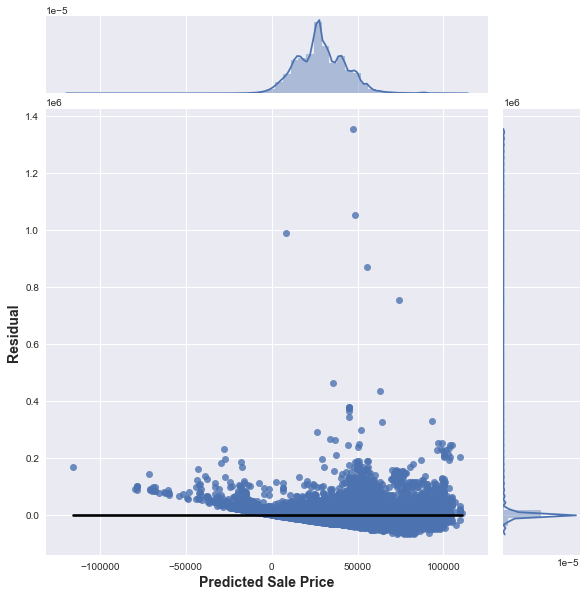

In [107]:
# Create a residual plot
plt.figure(figsize = (20, 16))
sns.jointplot(x = pred, y = resid, kind = 'reg', ratio = 5, height = 8, \
             line_kws = {'color' : 'black'})

#Add x and y labels
plt.xlabel('Predicted Sale Price', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')
plt.ylabel('Residual', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')

## The residual plot shows that WE WILL PAY ***YOU*** TO TAKE OUR CARS COME ON DOWN NOW AND GET YOURS!!

## The many predicted sales prices below zero are an issue that needs to be fixed as well as the oddly high residuals around the 50000 mark.

In [108]:
df_cars.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298603 entries, 273335 to 52208
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city                  298603 non-null  object 
 1   back_legroom          283711 non-null  object 
 2   bed                   2311 non-null    object 
 3   bed_height            37875 non-null   object 
 4   bed_length            37875 non-null   object 
 5   body_type             297310 non-null  object 
 6   cabin                 5547 non-null    object 
 7   city_fuel_economy     298603 non-null  float64
 8   daysonmarket          298603 non-null  int64  
 9   dealer_zip            298603 non-null  int64  
 10  engine_cylinders      288588 non-null  object 
 11  engine_displacement   282071 non-null  float64
 12  engine_type           288588 non-null  object 
 13  exterior_color        298596 non-null  object 
 14  fleet                 160126 non-null  object 
 

In [109]:
def leather_seats(c):
    ls = 'Leather Seats'
    list_options = str(c['major_options'])
    
    if list_options.find(ls) >= 0:
        return 1
    else:
        return 0

    
df_reg['leather_seats'] = df_cars.apply(leather_seats, axis = 1)

#Create a function to pull a feature out of the major_options category

In [110]:
df_reg.head()

# view head

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats
273335,2008,0,1,22.0,29.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,194490.0,66,13900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
246910,2013,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,196315.0,73,7695.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
266975,2013,0,1,20.0,28.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,91212.0,35,9479.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
def bluetooth(c):
    bt = 'Bluetooth'
    list_options = str(c['major_options'])
    
    if list_options.find(bt) >= 0:
        return 1
    else:
        return 0

    
df_reg['bluetooth'] = df_cars.apply(bluetooth, axis = 1)

#Create a function to pull a feature out of major_options

In [112]:
df_reg.head()

# view head

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth
273335,2008,0,1,22.0,29.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,194490.0,66,13900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
246910,2013,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,196315.0,73,7695.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
266975,2013,0,1,20.0,28.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,91212.0,35,9479.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [113]:
def backupcam(c):
    bc = 'Backup Camera'
    list_options = str(c['major_options'])
    
    if list_options.find(bc) >= 0:
        return 1
    else:
        return 0

    
df_reg['backup_camera'] = df_cars.apply(backupcam, axis = 1)

#Create a function to pull a feature out of major_options

In [114]:
df_reg.head()

# view head

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera
273335,2008,0,1,22.0,29.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,194490.0,66,13900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
246910,2013,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,196315.0,73,7695.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
266975,2013,0,1,20.0,28.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,91212.0,35,9479.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [115]:
def sunmoon(c):
    sm = 'Sunroof/Moonroof'
    list_options = str(c['major_options'])
    
    if list_options.find(sm) >= 0:
        return 1
    else:
        return 0

    
df_reg['Sunroof/Moonroof'] = df_cars.apply(sunmoon, axis = 1)
df_reg.head()

#Create a function to pull a feature out of major_options

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera,Sunroof/Moonroof
273335,2008,0,1,22.0,29.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,194490.0,66,13900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
246910,2013,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,196315.0,73,7695.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
266975,2013,0,1,20.0,28.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,91212.0,35,9479.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
def phonecap(c):
    cp = 'CarPlay'
    aa = 'Android Auto'
    list_options = str(c['major_options'])
    
    if list_options.find(cp) >= 0 or list_options.find(aa) >=0:
        return 1
    else:
        return 0

    
df_reg['Phone Capability'] = df_cars.apply(phonecap, axis = 1)
df_reg.head()

#Create a function to pull a feature out of major_options

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera,Sunroof/Moonroof,Phone Capability
273335,2008,0,1,22.0,29.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,1,194490.0,66,13900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
246910,2013,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,196315.0,73,7695.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
266975,2013,0,1,20.0,28.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,91212.0,35,9479.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [117]:
X = df_reg.drop('price', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# multiple regression number 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     5080.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:46:19   Log-Likelihood:            -3.2023e+06
No. Observations:              298603   AIC:                         6.405e+06
Df Residuals:                  298500   BIC:                         6.406e+06
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -2.31e+06   1.58e+04   -146.524      0.000   -2.34e+06   -2.28e+06
year                       1160.5231      7.825    148.312      0.000    1145.187    1175.860
is_new                     8049.7377     94.016     85.621      0.000    7865.468    8234.007
is_cpo                    -2553.0495     96.321    -26.506      0.000   -2741.836   -2364.262
city_fuel_economy           135.5187     11.515     11.769      0.000     112.950     158.087
highway_fuel_economy       -442.7647     13.059    -33.904      0.000    -468.360    -417.169
has_accident              -1579.1834     70.409    -22.429      0.000   -1717.182   -1441.184
owner_count               -2326.8458     32.934    -70.652      0.000   -2391.395   -2262.297
ft_Biodiesel               1.665e+04    257.114     64.762      0.000    1.61e+04    1.72e+04
ft_Compressed Natural Gas   582.0953   2841.980      0.205      0.838   -4988.106    6152.296
ft_Diesel                  7750.1649    186.147     41.635      0.000    7385.322    8115.008
ft_Electric                2.314e+04    393.275     58.836      0.000    2.24e+04    2.39e+04
ft_Flex Fuel Vehicle      -2098.1345    106.349    -19.729      0.000   -2306.575   -1889.694
ft_Hybrid                  2068.4930    175.974     11.755      0.000    1723.590    2413.396
ft_Unknown                 5962.7918    139.247     42.822      0.000    5689.871    6235.713
ws_4WD                     1.085e+04    103.617    104.723      0.000    1.06e+04    1.11e+04
ws_4X2                     5114.9789    125.736     40.680      0.000    4868.539    5361.419
ws_AWD                     3735.0367     72.924     51.219      0.000    3592.109    3877.965
ws_RWD                     2763.6648    102.106     27.067      0.000    2563.540    2963.789
ws_Unknown                 5666.3696    118.331     47.886      0.000    5434.444    5898.296
mileage                      -0.0016      0.000    -15.062      0.000      -0.002      -0.001
days_on_market                2.2766      0.201     11.315      0.000       1.882       2.671
mn_Acura                   5445.2365    194.554     27.988      0.000    5063.916    5826.557
mn_Audi                    1.261e+04    195.348     64.564      0.000    1.22e+04     1.3e+04
mn_BMW                     1.326e+04    150.750     87.957      0.000     1.3e+04    1.36e+04
mn_Buick                  -2341.9133    164.081    -14.273      0.000   -2663.507   -2020.320
mn_Cadillac                9209.7458    177.320     51.939      0.000    8862.203    9557.288
mn_Chevrolet              -1883.3352     84.716    -22.231      0.000   -2049.377   -1717.293
mn_Chrysler                -408.3538    208.793     -1.956      0.050    -817.582       0.875
mn_Dodge                  -2684.8933    141.311    -19.000      0.000   -29

Text(47.0, 0.5, 'Residual')

<Figure size 1440x1152 with 0 Axes>

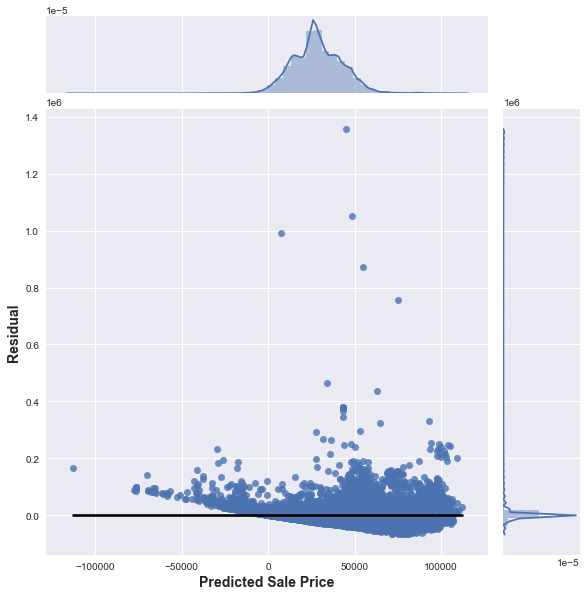

In [118]:
# Create a residual plot
plt.figure(figsize = (20, 16))
sns.jointplot(x = pred, y = resid, kind = 'reg', ratio = 5, height = 8, \
             line_kws = {'color' : 'black'})

#Add x and y labels
plt.xlabel('Predicted Sale Price', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')
plt.ylabel('Residual', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')

## The third multiple regression and residual plot does not show much of a difference from the second one. Indicating that pulling out features from major options did not have much of an effect.

In [119]:
features = X.drop('const', axis = 1)

# Create a dataframe that includes the X dataset without the constant

corrMatrix = features.corr()

# Create a corrMatrix

df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix, 3)

#Convert corrMatrix to a dataframe

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera,Sunroof/Moonroof,Phone Capability
year,1.000,0.564,-0.020,0.139,0.135,0.367,-0.696,0.017,-0.008,-0.049,0.020,-0.067,0.020,-0.022,0.017,0.027,0.019,-0.151,-0.005,-0.188,-0.036,-0.007,-0.015,-0.029,0.008,-0.021,0.003,-0.029,-0.030,0.009,0.000,0.035,-0.010,-0.001,0.024,0.047,-0.009,-0.059,0.003,-0.010,0.018,-0.057,0.014,0.020,-0.023,0.053,0.004,-0.029,0.011,0.008,-0.105,-0.096,-0.033,-0.021,0.020,-0.067,0.001,-0.052,0.010,-0.014,0.012,0.024,0.000,0.012,0.033,-0.002,-0.018,-0.050,0.005,-0.015,0.006,0.011,-0.012,0.014,-0.011,-0.003,-0.007,-0.017,-0.054,0.014,0.034,0.018,0.026,-0.013,-0.016,0.005,-0.039,0.001,-0.008,0.000,-0.078,-0.015,-0.090,0.004,0.014,0.014,-0.046,-0.076,0.115,0.375,-0.003,0.314
is_new,0.564,1.000,0.222,0.094,0.057,0.803,-0.728,0.017,-0.005,-0.001,0.025,-0.072,0.039,0.067,0.022,0.033,-0.019,-0.102,0.099,-0.155,0.155,-0.009,-0.028,-0.054,0.025,-0.004,0.027,-0.035,-0.047,0.006,0.048,0.021,-0.035,0.004,0.016,0.016,-0.013,-0.047,0.016,-0.005,0.034,-0.061,0.002,-0.029,-0.003,0.062,-0.005,-0.052,0.014,0.021,-0.054,-0.054,-0.028,-0.026,0.086,-0.121,0.010,-0.066,0.019,-0.001,0.021,-0.009,-0.008,0.019,0.028,0.005,-0.011,-0.059,0.000,-0.025,0.008,0.024,-0.013,0.008,0.006,0.014,-0.026,-0.030,-0.048,0.020,0.049,0.011,0.026,0.002,-0.104,0.008,-0.026,-0.005,-0.009,-0.026,-0.023,0.015,-0.069,0.049,-0.025,0.004,-0.025,-0.148,-0.215,0.049,-0.013,0.300
is_cpo,-0.020,0.222,1.000,-0.013,-0.028,0.227,-0.049,0.017,0.002,0.009,0.005,0.031,0.014,0.026,0.038,0.019,-0.054,-0.012,0.034,0.007,0.067,-0.019,-0.024,-0.047,0.011,-0.009,0.035,0.011,0.018,0.016,-0.002,0.020,-0.023,-0.009,0.016,0.017,-0.015,-0.026,-0.005,0.002,-0.021,-0.049,0.019,-0.000,-0.025,0.020,-0.030,-0.033,-0.053,-0.000,-0.005,0.008,0.004,0.013,0.049,-0.039,0.023,-0.024,0.005,-0.005,-0.011,-0.000,-0.015,-0.022,0.010,0.012,0.010,0.014,0.024,0.013,-0.005,-0.021,0.002,-0.021,0.005,0.022,-0.013,-0.007,0.011,0.001,0.001,-0.029,-0.012,-0.005,0.026,-0.009,0.006,0.003,0.004,0.003,0.013,0.018,0.004,0.037,-0.006,0.003,0.007,-0.038,-0.094,-0.105,-0.068,-0.016
city_fuel_economy,0.139,0.094,-0.013,1.000,0.937,0.070,-0.123,-0.009,-0.000,0.002,0.523,-0.137,0.412,-0.016,-0.239,-0.148,-0.059,-0.121,-0.018,-0.034,0.003,-0.032,-0.011,-0.007,-0.012,-0.064,-0.013,-0.051,-0.119,-0.073,0.140,0.078,-0.057,0.010,-0.093,0.060,-0.043,-0.018,-0.039,0.019,0.027,-0.048,0.038,0.111,-0.004,-0.099,0.027,0.149,0.025,-0.016,-0.038,-0.063,0.281,-0.097,-0.223,0.244,-0.023,0.118,0.014,0.006,-0.001,-0.003,0.012,0.003,-0.006,-0.007,-0.011,-0.024,-0.004,-0.008,-0.014,0.020,-0.007,-0.008,0.004,-0.019,-0.006,0.016,-0.002,-0.012,0.007,0.093,0.008,-0.021,0.036,-0.008,0.005,-0.009,-0.008,-0.021,-0.034,-0.035,-0.042,-0.185,-0.164,-0.165,-0.025,-0.140,0.023,0.047,-0.077,0.039
highway_fuel_economy,0.135,0.057,-0.028,0.937,1.000,0.046,-0.096,-0.008,0.001,0.008,0.445,-0.158,0.274,-0.016,-0.326,-0.191,-

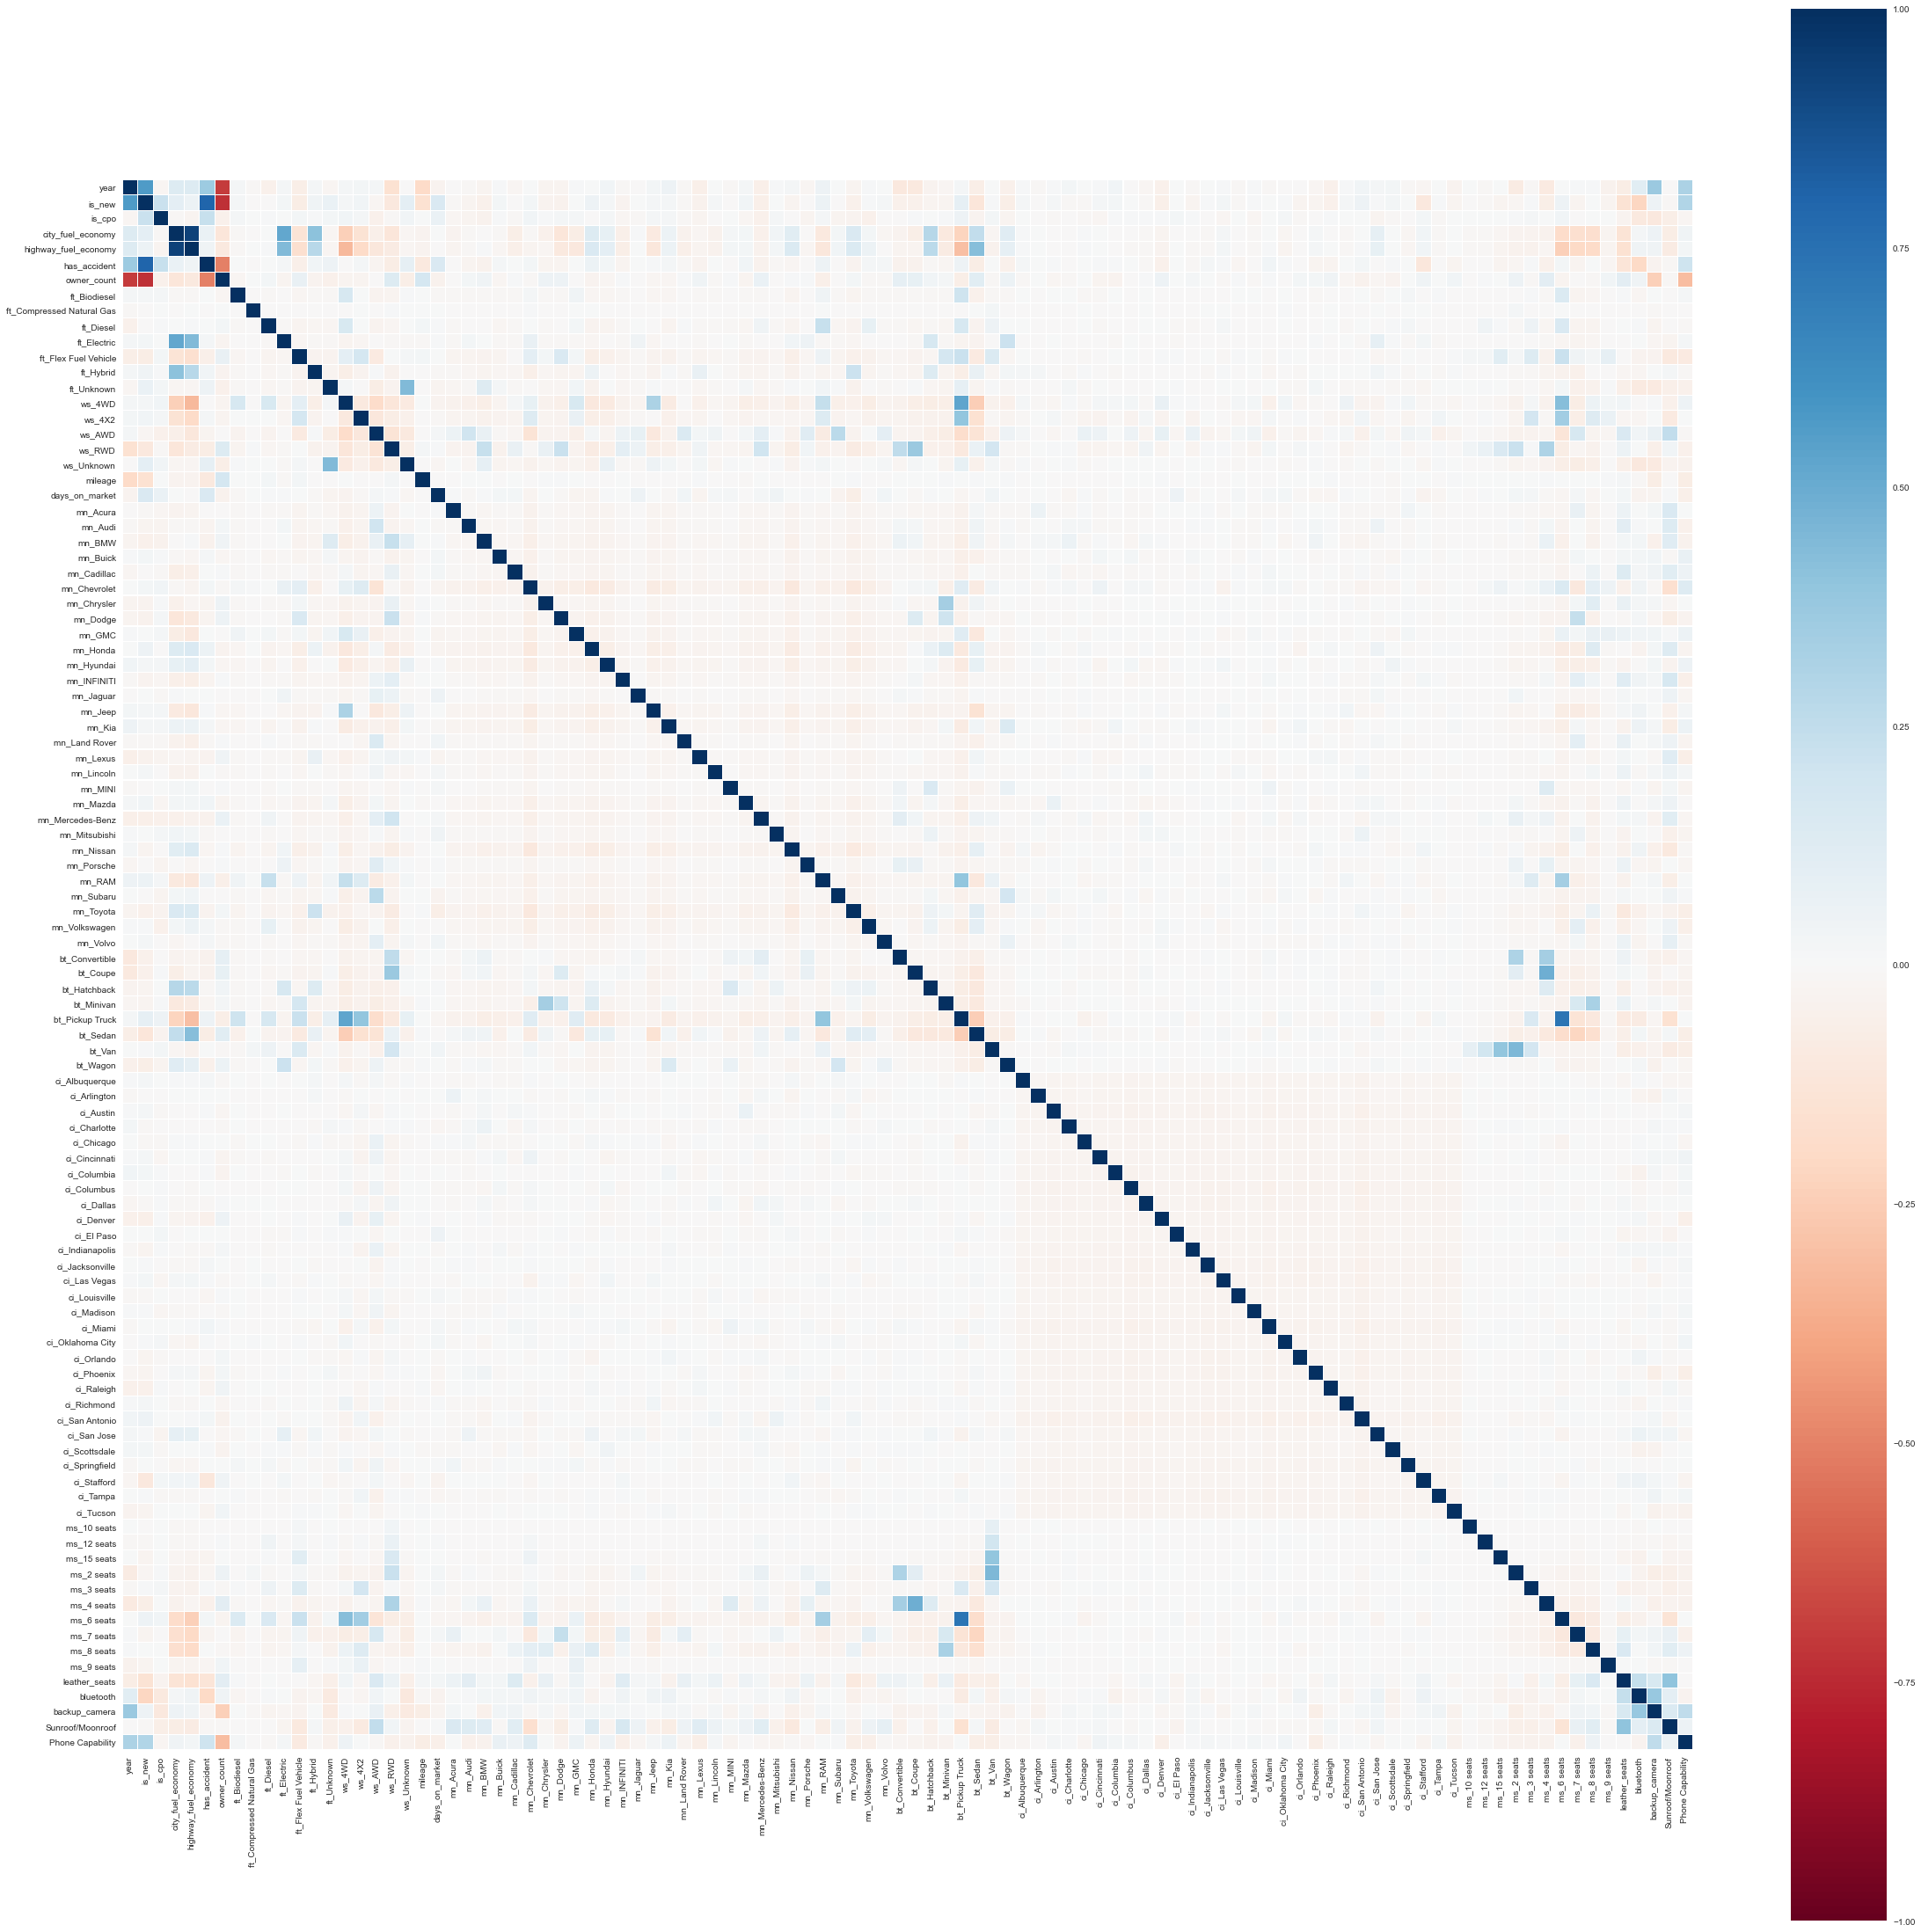

In [120]:
#Set the colormap for the heatmap
colormap = plt.cm.RdBu

#Set the size for the figure
plt.figure(figsize = (40, 40))

#Create the heatmap
sns.heatmap(df_corrMatrix, linewidths = 0.1, vmax = 1.0, vmin = -1.0, \
            square = True, cmap = colormap, linecolor = 'white', annot = False)

## The heatmap shows significant correlation in the top left corner that seems to make sense.

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import the library for VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

#Import the library for VIF

vif['Features'] = X.columns[1:]

round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

#Add a column for labels

,VIF Factor,Features
4,20.7,highway_fuel_economy
3,20.3,city_fuel_economy
1,5.4,is_new
54,4.2,bt_Pickup Truck
14,3.2,ws_4WD
...,...,...
36,1.1,mn_Land Rover
87,1.0,ms_10 seats
96,1.0,ms_9 seats
19,1.0,mileage


## The VIF shows multicollinearity for the two fuel economy features.

In [122]:
df_reg = df_reg[df_reg['year'] >= 2015]

# Drop the cars made before 2010

In [123]:
df_reg.info()

# view info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254130 entries, 20660 to 52208
Columns: 103 entries, year to Phone Capability
dtypes: float64(5), int32(89), int64(9)
memory usage: 115.4 MB


In [124]:
df_reg.head()

# view head

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,price,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera,Sunroof/Moonroof,Phone Capability
20660,2020,1,1,12.0,16.0,1,0.0,0,0,0,0,0,0,0,0,0,1,0,0,98.0,117,98390.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0
129041,2020,1,1,23.0,32.0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,14.0,66,43960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0
330998,2020,1,1,123.0,99.0,1,0.0,0,0,0,1,0,0,0,0,0,0,0,0,5.0,57,33773.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
391889,2017,0,1,17.0,24.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,30260.0,92,27300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0
190885,2018,0,1,28.0,35.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,35843.0,100,15198.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0


In [125]:
df_reg['year'].value_counts().sum()

# view sum of value counts for year

254130

In [126]:
X = df_reg.drop('price', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# fourth regression model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4880.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:56:46   Log-Likelihood:            -2.7044e+06
No. Observations:              254130   AIC:                         5.409e+06
Df Residuals:                  254027   BIC:                         5.410e+06
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -4.977e+06   4.76e+04   -104.571      0.000   -5.07e+06   -4.88e+06
year                       2481.7394     23.570    105.292      0.000    2435.543    2527.936
is_new                     5475.5494    117.272     46.691      0.000    5245.699    5705.400
is_cpo                    -1084.6144     90.011    -12.050      0.000   -1261.034    -908.195
city_fuel_economy           190.8519     11.682     16.338      0.000     167.956     213.748
highway_fuel_economy       -554.7364     13.515    -41.045      0.000    -581.226    -528.247
has_accident               -692.8546     82.601     -8.388      0.000    -854.750    -530.959
owner_count                -642.8379     58.938    -10.907      0.000    -758.355    -527.321
ft_Biodiesel               1.761e+04    248.273     70.930      0.000    1.71e+04    1.81e+04
ft_Compressed Natural Gas  7435.2244   5849.732      1.271      0.204   -4030.094    1.89e+04
ft_Diesel                  1.121e+04    215.060     52.136      0.000    1.08e+04    1.16e+04
ft_Electric                  2.6e+04    378.928     68.605      0.000    2.53e+04    2.67e+04
ft_Flex Fuel Vehicle       -501.7104    117.229     -4.280      0.000    -731.476    -271.945
ft_Hybrid                  2581.6938    176.944     14.590      0.000    2234.889    2928.499
ft_Unknown                 4243.8708    140.095     30.293      0.000    3969.288    4518.453
ws_4WD                     1.089e+04    106.333    102.418      0.000    1.07e+04    1.11e+04
ws_4X2                     4885.7961    127.923     38.193      0.000    4635.070    5136.522
ws_AWD                     3606.6634     72.484     49.758      0.000    3464.596    3748.730
ws_RWD                     3572.8710    110.930     32.208      0.000    3355.451    3790.291
ws_Unknown                 4712.1369    119.922     39.293      0.000    4477.094    4947.180
mileage                      -0.0004      0.000     -3.653      0.000      -0.001      -0.000
days_on_market                2.4561      0.228     10.782      0.000       2.010       2.903
mn_Acura                   6625.3012    196.190     33.770      0.000    6240.774    7009.829
mn_Audi                    1.455e+04    199.420     72.941      0.000    1.42e+04    1.49e+04
mn_BMW                     1.682e+04    157.460    106.825      0.000    1.65e+04    1.71e+04
mn_Buick                  -1889.5631    162.262    -11.645      0.000   -2207.592   -1571.534
mn_Cadillac                1.079e+04    182.150     59.249      0.000    1.04e+04    1.11e+04
mn_Chevrolet              -2280.2695     85.369    -26.711      0.000   -2447.590   -2112.950
mn_Chrysler                -890.4077    223.657     -3.981      0.000   -1328.770    -452.045
mn_Dodge                  -3901.1987    149.821    -26.039      0.000   -41

Text(47.0, 0.5, 'Residual')

<Figure size 1440x1152 with 0 Axes>

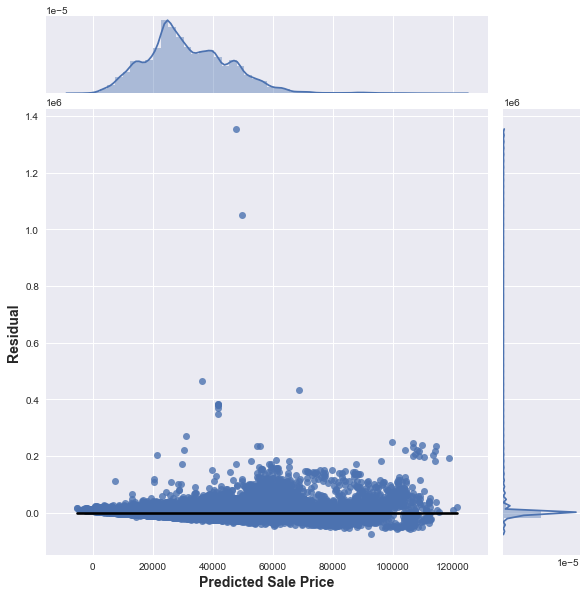

In [127]:
# Create a residual plot
plt.figure(figsize = (20, 16))
sns.jointplot(x = pred, y = resid, kind = 'reg', ratio = 5, height = 8, \
             line_kws = {'color' : 'black'})

#Add x and y labels
plt.xlabel('Predicted Sale Price', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')
plt.ylabel('Residual', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')

## The fourth regression and residual plot dont show a significant difference in the R^2 value, but we finally stopped giving away money and cars.

In [128]:
features = X.drop('const', axis = 1)

# Create a dataframe that includes the X dataset without the constant

corrMatrix = features.corr()

# Create a corrMatrix

df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix, 3)

#Convert corrMatrix to a dataframe

,year,is_new,is_cpo,city_fuel_economy,highway_fuel_economy,has_accident,owner_count,ft_Biodiesel,ft_Compressed Natural Gas,ft_Diesel,ft_Electric,ft_Flex Fuel Vehicle,ft_Hybrid,ft_Unknown,ws_4WD,ws_4X2,ws_AWD,ws_RWD,ws_Unknown,mileage,days_on_market,mn_Acura,mn_Audi,mn_BMW,mn_Buick,mn_Cadillac,mn_Chevrolet,mn_Chrysler,mn_Dodge,mn_GMC,mn_Honda,mn_Hyundai,mn_INFINITI,mn_Jaguar,mn_Jeep,mn_Kia,mn_Land Rover,mn_Lexus,mn_Lincoln,mn_MINI,mn_Mazda,mn_Mercedes-Benz,mn_Mitsubishi,mn_Nissan,mn_Porsche,mn_RAM,mn_Subaru,mn_Toyota,mn_Volkswagen,mn_Volvo,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,ci_Albuquerque,ci_Arlington,ci_Austin,ci_Charlotte,ci_Chicago,ci_Cincinnati,ci_Columbia,ci_Columbus,ci_Dallas,ci_Denver,ci_El Paso,ci_Indianapolis,ci_Jacksonville,ci_Las Vegas,ci_Louisville,ci_Madison,ci_Miami,ci_Oklahoma City,ci_Orlando,ci_Phoenix,ci_Raleigh,ci_Richmond,ci_San Antonio,ci_San Jose,ci_Scottsdale,ci_Springfield,ci_Stafford,ci_Tampa,ci_Tucson,ms_10 seats,ms_12 seats,ms_15 seats,ms_2 seats,ms_3 seats,ms_4 seats,ms_6 seats,ms_7 seats,ms_8 seats,ms_9 seats,leather_seats,bluetooth,backup_camera,Sunroof/Moonroof,Phone Capability
year,1.000,0.764,0.159,0.040,-0.009,0.608,-0.791,0.001,-0.002,0.004,-0.001,-0.074,0.035,0.103,0.030,0.024,-0.031,-0.070,0.121,-0.106,0.100,-0.006,-0.033,-0.012,0.002,-0.010,0.022,-0.027,-0.031,0.010,0.031,0.033,-0.038,-0.005,0.010,0.038,-0.022,-0.054,-0.009,0.003,0.016,-0.054,0.009,-0.031,-0.007,0.034,-0.000,-0.003,0.010,0.026,-0.017,-0.048,-0.037,0.005,0.055,-0.111,-0.005,-0.066,0.012,0.003,0.021,-0.003,0.003,0.008,0.019,-0.011,0.012,-0.024,-0.010,-0.026,0.011,0.016,-0.018,-0.004,0.002,0.007,-0.005,-0.009,-0.048,0.010,0.034,-0.001,0.016,-0.002,-0.086,0.019,-0.022,-0.005,-0.013,-0.021,-0.015,0.012,-0.045,0.023,-0.013,0.032,-0.012,-0.134,-0.255,-0.057,-0.045,0.281
is_new,0.764,1.000,0.285,0.047,0.004,0.860,-0.842,0.012,0.001,0.037,0.018,-0.047,0.045,0.076,0.019,0.034,-0.033,-0.070,0.115,-0.092,0.222,-0.009,-0.028,-0.049,0.024,0.004,0.028,-0.030,-0.046,0.004,0.062,0.015,-0.042,0.002,0.006,0.003,-0.015,-0.037,0.013,0.002,0.032,-0.054,-0.005,-0.048,0.001,0.051,-0.006,-0.051,0.020,0.023,-0.035,-0.035,-0.016,-0.018,0.094,-0.118,0.013,-0.062,0.021,0.007,0.021,-0.023,-0.009,0.016,0.019,0.006,-0.003,-0.052,-0.002,-0.026,0.007,0.024,-0.011,0.002,0.004,0.020,-0.028,-0.027,-0.035,0.017,0.045,0.003,0.015,0.009,-0.127,0.011,-0.010,-0.007,-0.007,-0.033,0.002,0.026,-0.046,0.059,-0.035,0.003,-0.011,-0.149,-0.329,-0.160,-0.011,0.216
is_cpo,0.159,0.285,1.000,0.001,-0.015,0.274,-0.178,0.019,0.001,0.016,0.008,0.026,0.015,0.029,0.042,0.022,-0.056,-0.028,0.038,-0.011,0.078,-0.022,-0.028,-0.057,0.012,-0.012,0.038,0.009,0.017,0.017,-0.003,0.023,-0.025,-0.009,0.019,0.021,-0.016,-0.035,-0.004,0.001,-0.021,-0.062,0.021,0.002,-0.026,0.025,-0.033,-0.040,-0.051,-0.000,-0.015,0.002,0.001,0.012,0.055,-0.048,0.025,-0.032,0.007,-0.008,-0.011,0.003,-0.017,-0.023,0.014,0.013,0.008,0.012,0.026,0.013,-0.004,-0.022,0.001,-0.021,0.006,0.023,-0.016,-0.010,0.007,0.002,0.004,-0.029,-0.010,-0.006,0.029,-0.008,0.002,0.003,0.004,0.004,0.009,0.019,-0.004,0.039,-0.006,0.003,0.004,-0.048,-0.089,-0.081,-0.075,0.010
city_fuel_economy,0.040,0.047,0.001,1.000,0.940,0.048,-0.044,-0.014,-0.001,-0.010,0.538,-0.125,0.414,-0.025,-0.246,-0.153,-0.056,-0.099,-0.029,-0.007,0.015,-0.032,-0.008,0.002,-0.012,-0.062,-0.009,-0.049,-0.125,-0.075,0.151,0.076,-0.059,0.014,-0.096,0.056,-0.040,-0.015,-0.043,0.013,0.023,-0.038,0.038,0.109,0.001,-0.110,0.027,0.154,0.016,-0.015,-0.024,-0.060,0.287,-0.098,-0.236,0.259,-0.021,0.129,0.014,0.010,-0.004,-0.008,0.014,0.001,-0.012,-0.008,-0.006,-0.019,-0.004,-0.006,-0.016,0.020,-0.006,-0.010,0.002,-0.019,-0.007,0.020,0.004,-0.016,0.004,0.097,0.005,-0.020,0.040,-0.010,0.014,-0.010,-0.005,-0.021,-0.018,-0.033,-0.031,-0.191,-0.169,-0.168,-0.017,-0.133,-0.010,-0.012,-0.077,0.003
highway_fuel_economy,-0.009,0.004,-0.015,0.940,1.000,0.020,0.005,-0.013,-0.001,-0.011,0.465,-0.143,0.280,-0.025,-0.334,-0.197,-0.

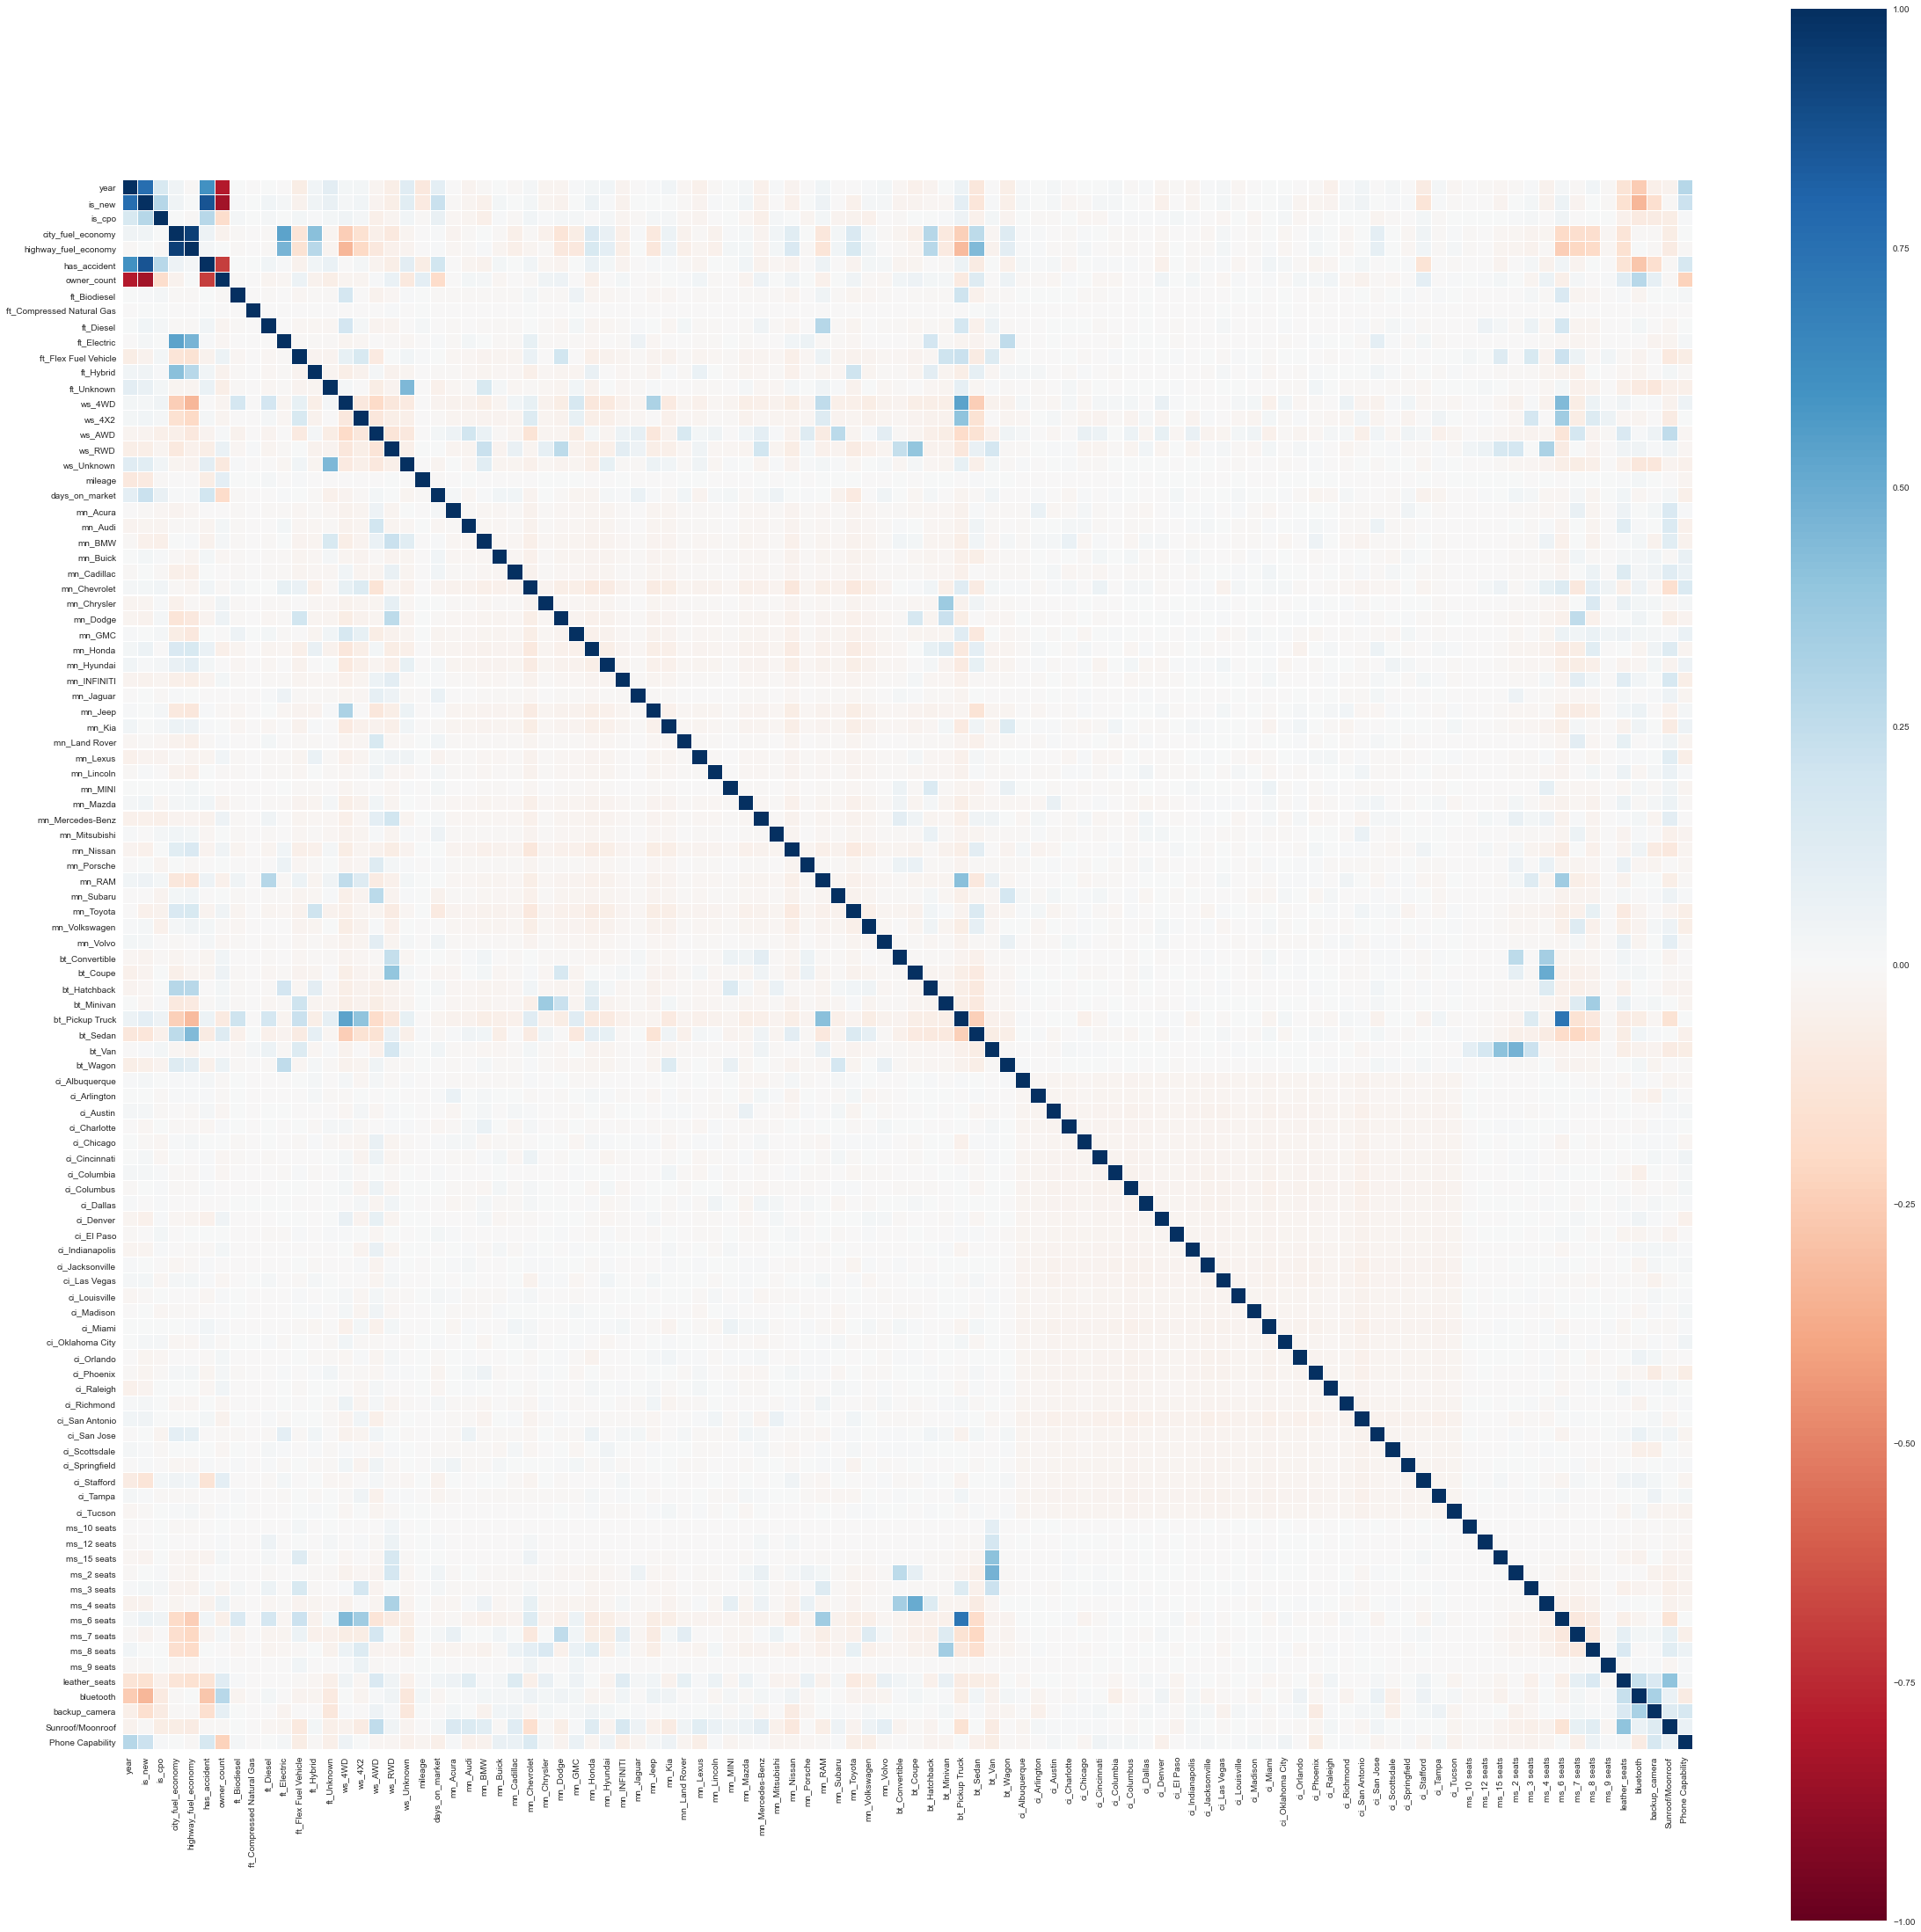

In [129]:
#Set the colormap for the heatmap
colormap = plt.cm.RdBu

#Set the size for the figure
plt.figure(figsize = (40, 40))

#Create the heatmap
sns.heatmap(df_corrMatrix, linewidths = 0.1, vmax = 1.0, vmin = -1.0, \
            square = True, cmap = colormap, linecolor = 'white', annot = False)

In [ ]:
#Import the library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create the VIF for the features dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

#Add a column for labels
vif['Features'] = X.columns[1:]

round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

In [ ]:
df_reg['comb_fuel_economy'] = (df_reg['highway_fuel_economy'] + df_reg['city_fuel_economy']) / 2
df_reg = df_reg.drop(['highway_fuel_economy', 'city_fuel_economy'], axis = 1)

#combine fuel econ

In [ ]:
df_reg.info()

# view info

In [ ]:
X = df_reg.drop('price', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# fifth regression

In [ ]:
# Create a residual plot
plt.figure(figsize = (20, 16))
sns.jointplot(x = pred, y = resid, kind = 'reg', ratio = 5, height = 8, \
             line_kws = {'color' : 'black'})

#Add x and y labels
plt.xlabel('Predicted Sale Price', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')
plt.ylabel('Residual', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')

## Finally at the fifth regression and residual plot, after combining the fuel economies, we are making progress with our predicted sales prices. 

In [ ]:
features = X.drop('const', axis = 1)

# Create a dataframe that includes the X dataset without the constant

corrMatrix = features.corr()

# Create a corrMatrix

df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix, 3)

#Convert corrMatrix to a dataframe

In [ ]:
#Set the colormap for the heatmap
colormap = plt.cm.RdBu

#Set the size for the figure
plt.figure(figsize = (40, 40))

#Create the heatmap
sns.heatmap(df_corrMatrix, linewidths = 0.1, vmax = 1.0, vmin = -1.0, \
            square = True, cmap = colormap, linecolor = 'white', annot = False)

In [ ]:
#Import the library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create the VIF for the features dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

#Add a column for labels
vif['Features'] = X.columns[1:]

round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

In [ ]:
X = X.drop(['bt_Hatchback', 'ci_Las Vegas', 'ci_Raleigh', 'ci_Scottsdale'], axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# fifth regression

In [ ]:
X = X.drop('ft_Compressed Natural Gas', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# sixth regression

In [ ]:
X = X.drop('ci_Columbia', axis = 1)

y = df_reg['price']

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid

reg.summary()

# seventh regression

In [ ]:
# Create a residual plot
plt.figure(figsize = (20, 16))
sns.jointplot(x = pred, y = resid, kind = 'reg', ratio = 5, height = 8, \
             line_kws = {'color' : 'black'})

#Add x and y labels
plt.xlabel('Predicted Sale Price', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')
plt.ylabel('Residual', fontweight = 'bold', fontsize = 14, horizontalalignment = 'center')

### After removing more features with a non significant p-value, the R^2 and odd residuals did not change. Overall I think the model works pretty well considering we opted to not reduce our model to a specific brand or type of car. Considering the broad range of values we chose to use, and the very large and diverse dataset, the end model is a pretty good indicator of the predicted sale price of a car.